## Lending club case study

In [205]:
##importing modules needed for the assignment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [206]:
warnings.filterwarnings('ignore')

In [5]:
## load data file
loan_data = pd.read_csv("/Users/shahidshaikh/Downloads/loan.csv",low_memory=False)

In [41]:
#set the float notation to 2 digits
pd.options.display.float_format = '{:.2f}'.format
#need to look at all coloumns
pd.set_option('display.max_columns', None)

In [44]:
#observing first 5 rows
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [46]:
#checking rows and columns
loan_data.shape

(39717, 111)

## Data cleaning

In [47]:
#finding number of null values
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [50]:
#checking birds eye view of the data frame
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [54]:
#first thing first, finding percentage of null values
null_value_perc = round((loan_data.isnull().sum()/len(loan_data)) * 100,2)

In [67]:
#listing percentage each columns
null_value_perc[null_value_perc > 0]

emp_title                          6.19
emp_length                         2.71
desc                              32.58
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


In [65]:
#we have lots of null values in columns, as per our instructor in the lecture, we should remove coloumns with null values crossing more than 30%
#removing columns with more than 30% null values

In [68]:
loan_data.drop(null_value_perc[ null_value_perc > 30].index, axis=1, inplace=True)

In [82]:
#recheck null values
loan_data.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           11
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [84]:
# after dropping cols with null values
loan_data.shape

(39717, 53)

In [96]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00,1,INDIVIDUAL,0,0.00,0,0.00,0.00


In [103]:
loan_data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

### multiple columns have just one unique value - it's better to drop them as they won't be playing major part in the analysis

In [108]:
loan_data.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'],axis=1,inplace=True)

In [117]:
loan_data.nunique().sort_values(ascending=False)

id                         39717
url                        39717
member_id                  39717
total_pymnt                37850
total_pymnt_inv            37518
total_rec_int              35148
last_pymnt_amnt            34930
emp_title                  28820
revol_bal                  21711
title                      19615
installment                15383
funded_amnt_inv             8205
total_rec_prncp             7976
annual_inc                  5318
recoveries                  4040
dti                         2868
collection_recovery_fee     2616
total_rec_late_fee          1356
out_prncp_inv               1138
out_prncp                   1137
revol_util                  1089
funded_amnt                 1041
loan_amnt                    885
zip_code                     823
earliest_cr_line             526
int_rate                     371
last_credit_pull_d           106
last_pymnt_d                 101
total_acc                     82
issue_d                       55
addr_state

 #### id,url,member_id are identitical columns as they are unique in nature, I am going to keep id column and remove the two others.

In [118]:
loan_data.drop(['url','member_id'], axis=1, inplace=True)

#### emp_title and title contains text values and unique in nature, it won't be useful for our analysis 

In [127]:
loan_data.drop(['emp_title','title'], axis=1, inplace=True)

#### Objective is to find driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default which  company can utilise this knowledge for its portfolio and risk assessment. 

### Hence, columns related to meta data for borrowers who already took loans is not relevant for us. Hence removing those coloumns.

In [120]:
loan_data.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_credit_pull_d', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv','out_prncp','out_prncp_inv'],axis=1,inplace=True)

## Data Cleaning

### Let's find null values of in each columns

In [128]:
null_value_perc = round((loan_data.isnull().sum()/len(loan_data)) * 100,2)

In [129]:
null_value_perc[null_value_perc > 0]

emp_length             2.71
revol_util             0.13
pub_rec_bankruptcies   1.75
dtype: float64

#### Let's remove null values in these columns since we can't replace them with mean or median values.

In [130]:
loan_data.dropna(subset = ['emp_length','revol_util','pub_rec_bankruptcies'],inplace=True)

In [131]:
null_value_perc = round((loan_data.isnull().sum()/len(loan_data)) * 100,2)
null_value_perc[null_value_perc > 0]

Series([], dtype: float64)

#### let's check loan_status frequent values 

In [132]:
loan_data.loan_status.value_counts()

Fully Paid     31534
Charged Off     5266
Current         1098
Name: loan_status, dtype: int64

#### Since we need to analyze the driver variable for loans getting default, we should remove loans which are currently running i.e Current values

In [143]:
loan_data = loan_data[loan_data.loan_status != 'Current']

In [145]:
loan_data.shape

(36800, 31)

#### checking each text based columns if it has issues

In [158]:
loan_data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

#### removing leading spaces in the unique col

In [450]:
loan_data['term'] = loan_data.term.str.strip()

In [161]:
loan_data.term.unique()

array(['36 months', '60 months'], dtype=object)

In [163]:
loan_data.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [165]:
loan_data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [168]:
loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [174]:
loan_data.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

## Data type conversion

In [179]:
loan_data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

#### int_rate and revol_util seems to be object, should be float. Checking the problem.

In [180]:
loan_data.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
5         7.90%
          ...  
39562    10.28%
39573    10.59%
39623    12.49%
39666    11.22%
39680    11.86%
Name: int_rate, Length: 36800, dtype: object

In [181]:
loan_data.revol_util

0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39562    68.70%
39573       79%
39623    62.90%
39666    34.30%
39680    70.90%
Name: revol_util, Length: 36800, dtype: object

#### both of these columns contains % as a string which is a problem for analysis, removing % and converting them to float as should be

In [182]:
non_perc_int_rate = loan_data.int_rate.str.strip('%')

In [451]:
loan_data.int_rate = non_perc_int_rate.astype(float)

In [186]:
loan_data.int_rate.dtype

dtype('float64')

In [187]:
non_perc_revolt_rate = loan_data.revol_util.str.strip('%')

In [207]:
loan_data.revol_util = non_perc_revolt_rate.astype(float)

In [190]:
loan_data.revol_util.dtype

dtype('float64')

#### some date value columns are also object, converting them to Date data type

In [208]:
loan_data['issue_d'] = pd.to_datetime(loan_data.issue_d, format='%b-%y')

In [209]:
loan_data['issue_d'] = loan_data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2023 else x)

In [210]:
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data.earliest_cr_line, format='%b-%y')

In [212]:
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2023 else x)

In [221]:
loan_data.issue_d

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39562   2007-11-01
39573   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 36800, dtype: datetime64[ns]

#### So far date columns consist of single value, deriving year, month and date out of it will help in the analysis

In [222]:
loan_data['issue.d.year'] = loan_data.issue_d.dt.year

In [223]:
loan_data['issue.d.month'] = loan_data.issue_d.dt.month

In [224]:
loan_data['issue.d.dayofweek'] = loan_data.issue_d.dt.day_of_week

In [227]:
loan_data['earliest.cr.year'] = loan_data.earliest_cr_line.dt.year

In [230]:
loan_data['earliest.cr.month'] = loan_data.earliest_cr_line.dt.month

In [233]:
loan_data['earliest.cr.dayofweek'] = loan_data.earliest_cr_line.dt.day_of_week

In [231]:
loan_data['earliest.cr.month']

0         1
1         4
2        11
3         2
5        11
         ..
39562     3
39573     2
39623     8
39666    11
39680     7
Name: earliest.cr.month, Length: 36800, dtype: int64

In [234]:
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue.d.year,issue.d.month,issue.d.dayofweek,earliest.cr.year,earliest.cr.month,earliest.cr.dayofweek
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,5863.16,5833.84,171.62,0.00,2011,12,3,1985,1,1
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,1008.71,1008.71,119.66,0.00,2011,12,3,1999,4,3
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,3005.67,3005.67,649.91,0.00,2011,12,3,2001,11,3
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,12231.89,12231.89,357.48,0.00,2011,12,3,1996,2,3
5,1075269,5000,5000,5000.00,36 months,7.90,156.46,A,A4,3 years,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,5632.21,5632.21,161.03,0.00,2011,12,3,2004,11,0


#### Calcuting the loan amount asked vs approved ratio - gives an idea of approved amount vs asked by borrower

In [287]:
loan_data['approved_loan_amnt_percentage'] = round((loan_data.funded_amnt_inv/loan_data.loan_amnt)*100,2)

In [288]:
loan_data.drop(['approved_loan_amnt_perctange'],axis=1, inplace=True)

In [255]:
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue.d.year,issue.d.month,issue.d.dayofweek,earliest.cr.year,earliest.cr.month,earliest.cr.dayofweek,approved_loan_amnt_perctange
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70,9,5863.16,5833.84,171.62,0.00,2011,12,3,1985,1,1,99.50
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,1008.71,1008.71,119.66,0.00,2011,12,3,1999,4,3,100.00
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.50,10,3005.67,3005.67,649.91,0.00,2011,12,3,2001,11,3,100.00
3,1076863,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,12231.89,12231.89,357.48,0.00,2011,12,3,1996,2,3,100.00
5,1075269,5000,5000,5000.00,36 months,7.90,156.46,A,A4,3 years,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,5632.21,5632.21,161.03,0.00,2011,12,3,2004,11,0,100.00


In [256]:
loan_data.dtypes

id                                       int64
loan_amnt                                int64
funded_amnt                              int64
funded_amnt_inv                        float64
term                                    object
int_rate                               float64
installment                            float64
grade                                   object
sub_grade                               object
emp_length                              object
home_ownership                          object
annual_inc                             float64
verification_status                     object
issue_d                         datetime64[ns]
loan_status                             object
purpose                                 object
zip_code                                object
addr_state                              object
dti                                    float64
delinq_2yrs                              int64
earliest_cr_line                datetime64[ns]
inq_last_6mth

#### All the data type seems fine, let's proceed ahead with the analysis

## Univariate Analysis

#### Function to create bar plots

In [540]:
def createBarPlot(colName,xLabel,yLabel,rotation):
    data = loan_data[colName].value_counts()
    x = data.index
    barPlot = sns.barplot(x=x,y=data)
    barPlot.set(xlabel=xLabel)
    barPlot.set(ylabel=yLabel)
    plt.xticks(rotation=rotation)
    plt.show()

#### Function to create box plots

In [562]:
def createBoxPlot(colName,yLabel):
    boxPlot = sns.boxplot(data=loan_data[colName])
    boxPlot.set(ylabel=yLabel)
    plt.show()

### Analysing loan amount column

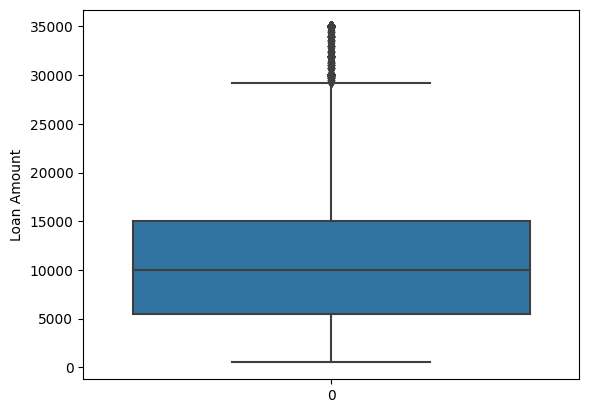

In [779]:
createBoxPlot('loan_amnt','Loan Amount')

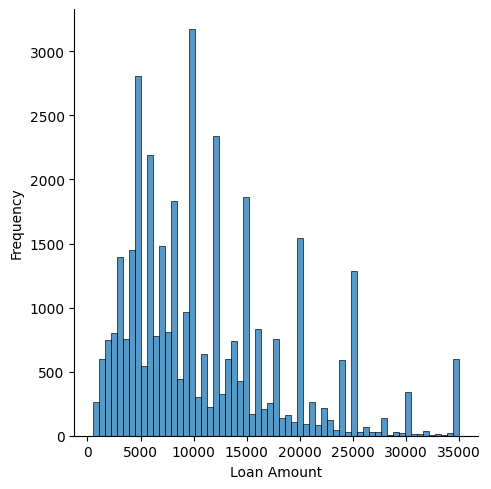

In [577]:
disPlot = sns.displot(data=loan_data.loan_amnt)
disPlot.set(xlabel='Loan Amount', ylabel='Frequency')
plt.show()

In [274]:
loan_data.loan_amnt.describe()

count   36800.00
mean    11149.54
std      7369.86
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

### Findings

Based on the data and report, majority of people took loan of amount 10000 where is very few people took loan of amount 35000. Very few people took loans in less than 5000 range. Median of loan amount is 10000 and mean is 11149.

### Analysing funded_amt column

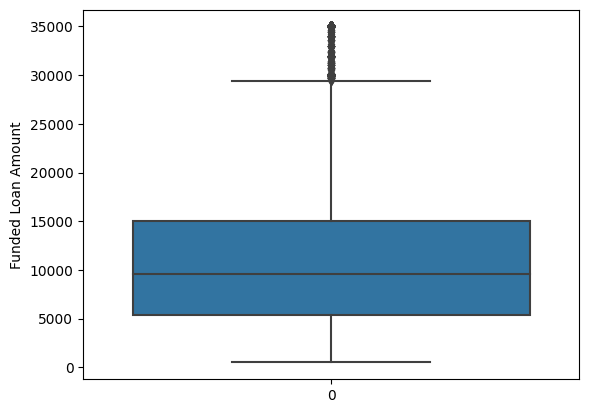

In [566]:
createBoxPlot('funded_amnt','Funded Loan Amount')

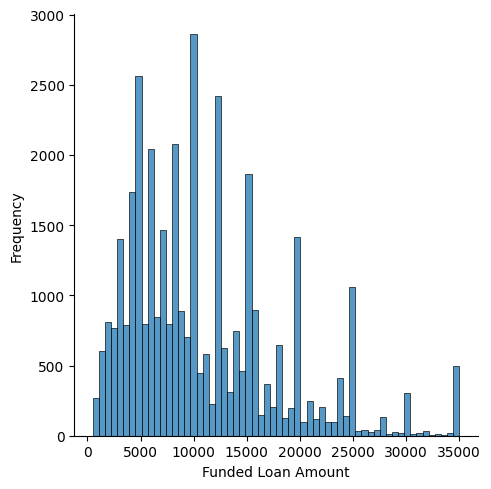

In [281]:
disPlot = sns.displot(data=loan_data.funded_amnt)
disPlot.set(xlabel='Funded Loan Amount', ylabel='Frequency')
plt.show()

In [280]:
loan_data.funded_amnt.describe()

count   36800.00
mean    10880.79
std      7109.16
min       500.00
25%      5400.00
50%      9600.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64

#### Findings

Funded loan amount and approved loan amount range is very near or similar i.e majority of the loan asked by the borrowers is approved by the lender.

#### Analysing funded_amnt_inv column

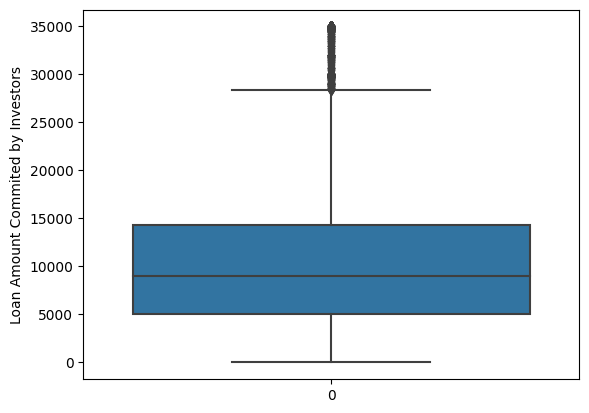

In [567]:
createBoxPlot('funded_amnt_inv','Loan Amount Commited by Investors')

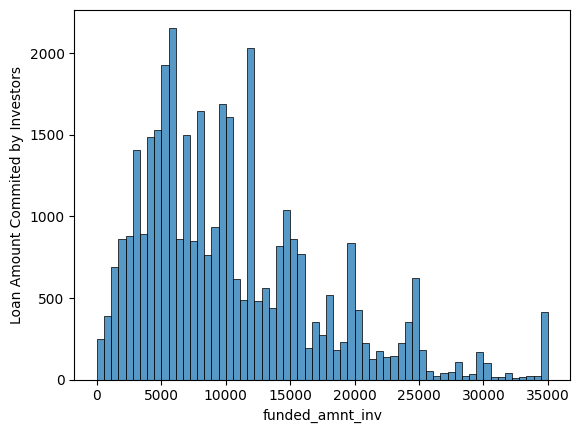

In [578]:
histPlot = sns.histplot(data=loan_data.funded_amnt_inv)
histPlot.set(ylabel='Loan Amount Commited by Investors')
plt.show()

In [286]:
loan_data.funded_amnt_inv.describe()

count   36800.00
mean    10439.06
std      7008.52
min         0.00
25%      5000.00
50%      9000.00
75%     14350.00
max     35000.00
Name: funded_amnt_inv, dtype: float64

#### Findings

Funded amount by investors behaves in similar way to loan amount i.e majority of the loan applications are funded.

#### Analysing loan terms

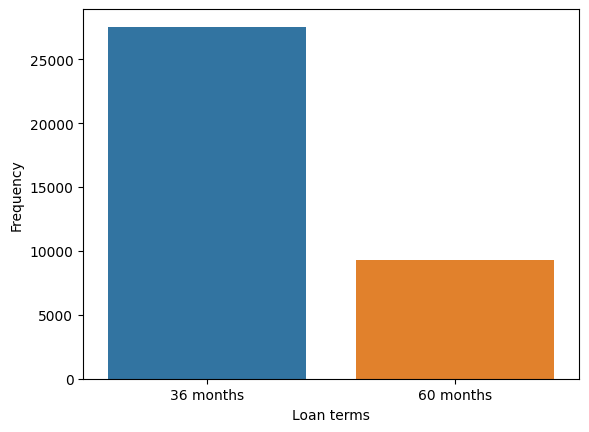

In [542]:
createBarPlot("term","Loan terms",'Frequency',0)

In [465]:
loan_data.term.value_counts()

36 months    27546
60 months     9254
Name: term, dtype: int64

#### Findings

Approx 75% of the loan borrowers opted for 36 months i.e 3 year loan term while 25% opted for longer loan terms.

#### Findings

This column also shows similarity between loan amount and approved loan amount by borrower and lender. Hence we can conclude that lenders funded majority of the loan requests by borrowers.

#### Analysing approved_loan_amnt_perctange column

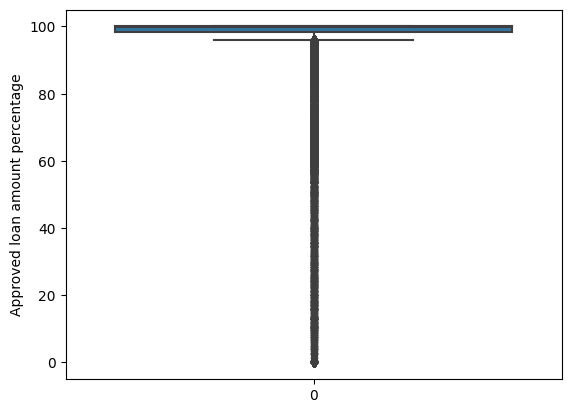

In [568]:
createBoxPlot('approved_loan_amnt_percentage','Approved loan amount percentage')

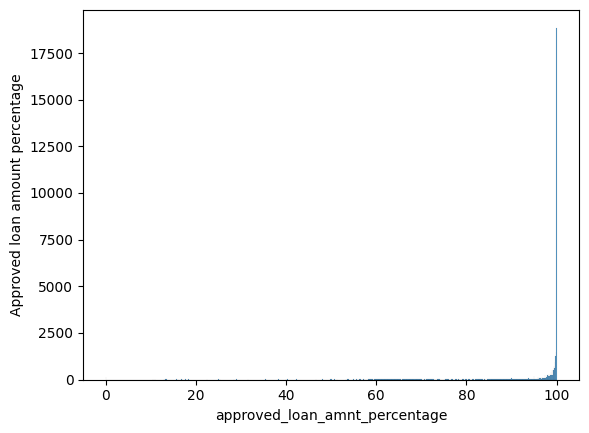

In [569]:
histPlot = sns.histplot(data=loan_data.approved_loan_amnt_percentage)
histPlot.set(ylabel='Approved loan amount percentage')
plt.show()

In [291]:
loan_data.approved_loan_amnt_percentage.describe()

count   36800.00
mean       94.82
std        15.02
min         0.00
25%        98.41
50%        99.97
75%       100.00
max       100.00
Name: approved_loan_amnt_percentage, dtype: float64

#### Findings

More than 75 percent of applications got approved 100% funding i.e they got the amount of loan what they asked for in the first place. This can be troublesome or good for business depending on the default rate which we will analyse later.

#### Analysing Interest rate

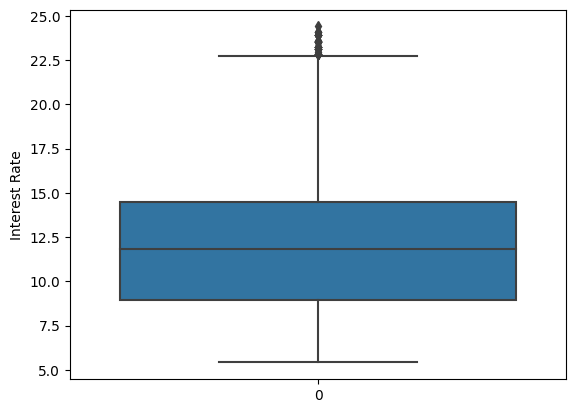

In [570]:
createBoxPlot("int_rate",'Interest Rate')

In [295]:
loan_data.int_rate.describe()

count   36800.00
mean       11.98
std         3.70
min         5.42
25%         8.94
50%        11.83
75%        14.46
max        24.40
Name: int_rate, dtype: float64

#### Findings

Majority of the loan interest rates floats between 10-14 percent while they are some high interest loans between 20-25 percent.

#### Analysing Installments - Monthly payment done by the borrowers to lenders

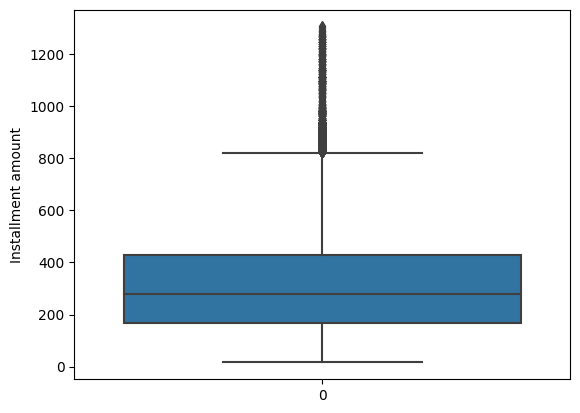

In [572]:
createBoxPlot('installment','Installment amount')

In [301]:
loan_data.installment.describe()

count   36800.00
mean      324.91
std       208.89
min        16.08
25%       167.73
50%       280.11
75%       429.37
max      1305.19
Name: installment, dtype: float64

#### Findings

Majority of the monthly installment amount ranges between 180-420. Median is 280. There are some high installments as well amounting 1305.

#### Analysing grade column

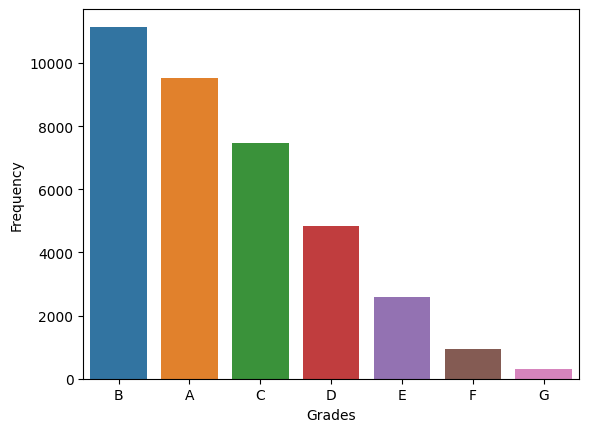

In [543]:
createBarPlot("grade","Grades",'Frequency',0)

#### Findings

Majority of the borrowers falls under B and A grades - 30 and 15 percent respectively. This is a good sign for lending club.

#### Analysing employment experience

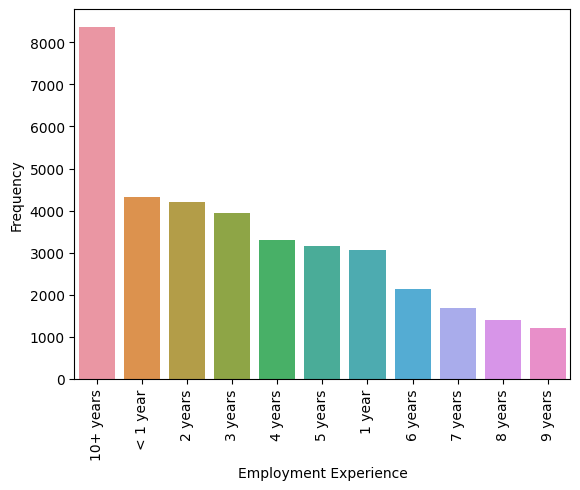

In [544]:
createBarPlot("emp_length","Employment Experience",'Frequency',90)

#### Findings

Majority of the employees have more than 10+ years of experience - this is ideal for any lenders club as this indicates mature borrowers. However, the next highest loan is given to people with less than 1 year experience. This may cause problems as they are prone to job cuts and can default to their loans.

#### Analysing home ownership data

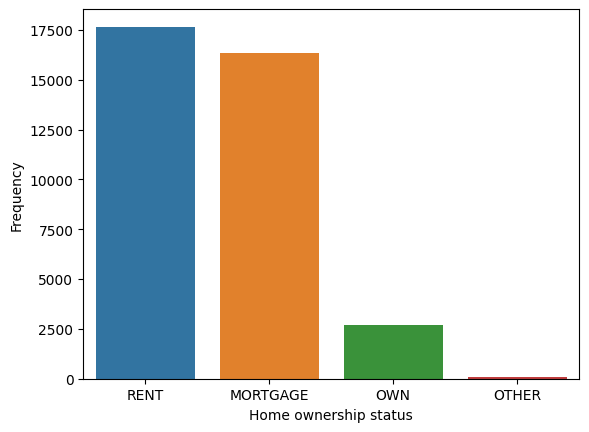

In [545]:
createBarPlot("home_ownership","Home ownership status",'Frequency',0)

In [502]:
loan_data.home_ownership.value_counts()

RENT        17667
MORTGAGE    16334
OWN          2703
OTHER          96
Name: home_ownership, dtype: int64

#### Findings

48% of borrowers decalred that they live on rent while close to 45% lives on mortgages home.

#### Analysing Annual Income - Income declared by the borrower during loan processing

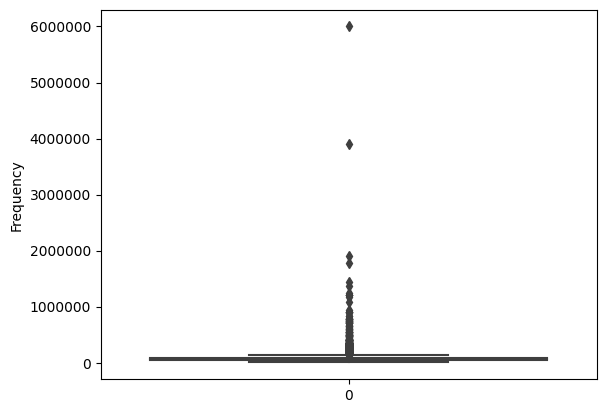

In [575]:
plt.ticklabel_format(style='plain', axis='y')
createBoxPlot('annual_inc','Frequency')

In [325]:
loan_data.annual_inc.describe()

count     36800.00
mean      69434.48
std       64021.59
min        4000.00
25%       41133.00
50%       60000.00
75%       83000.00
max     6000000.00
Name: annual_inc, dtype: float64

#### Findings

Majority of the borrowers have declared their annual income btween 40k to 200K. There are some outlier data where annual income is more than 400k.

#### Analysing Verification Status

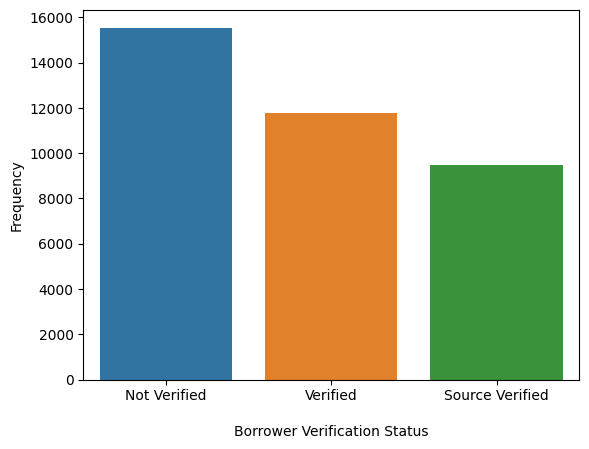

In [547]:
createBarPlot("verification_status","\nBorrower Verification Status",'Frequency',0)

#### Findings

Red flag - Majority of the loans applications or borrowers source income is not verified. This is not optimal for lenders and can generates more default.

#### Analysing issue year, month and day of week

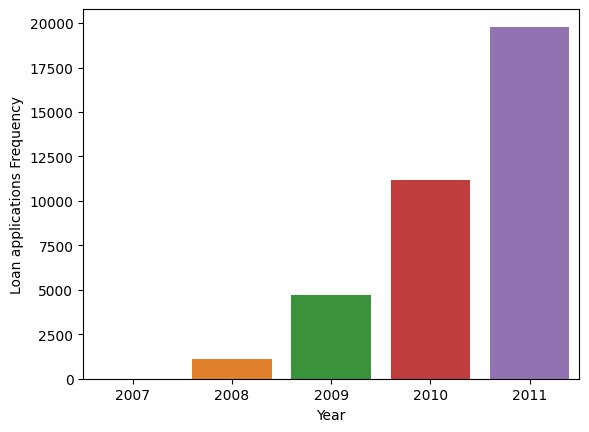

In [548]:
createBarPlot("issue.d.year","Year",'Loan applications Frequency',0)

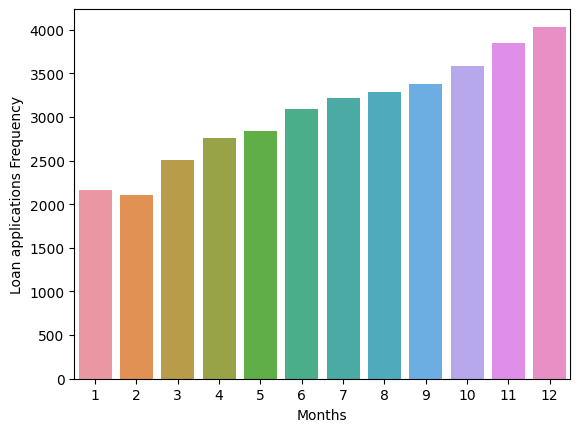

In [549]:
createBarPlot("issue.d.month","Months",'Loan applications Frequency',0)

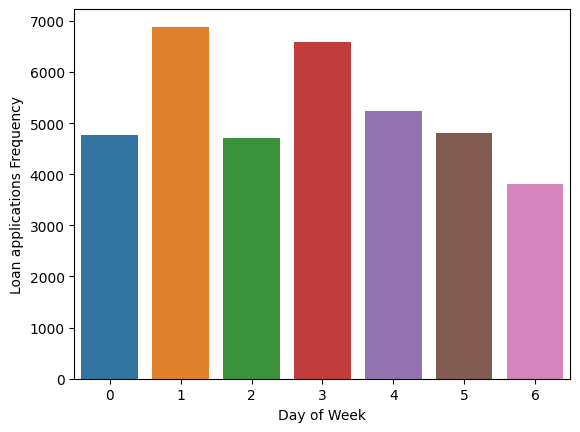

In [550]:
createBarPlot("issue.d.dayofweek","Day of Week",'Loan applications Frequency',0)

### Findings

- Based on the year graph, loan distribution is alomst doubling every year.
- Based on the month graph we can conclude that there is an incremental loan issue trends from January to December. The last quarter of the year is where majority of loan requests are coming in.
- Based on the week of day graph, Mondays and Wednesday is busy day of the week comparing to other days.

#### Analysing Loan Status column 

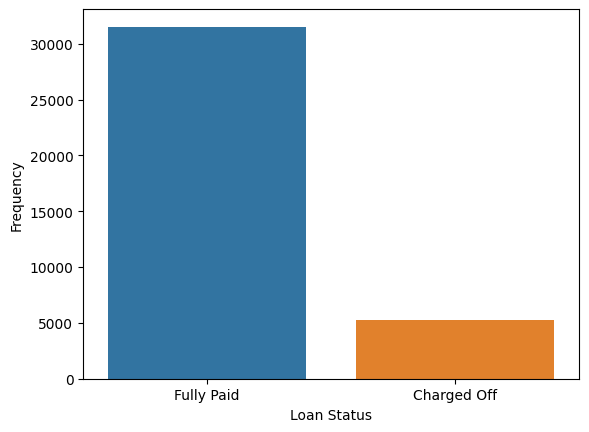

In [551]:
createBarPlot("loan_status","Loan Status",'Frequency',0)

#### Findings

85% loan is fully paid which is a good sign where as 15% of loans are defaulted.

#### Analysing Loan purpose

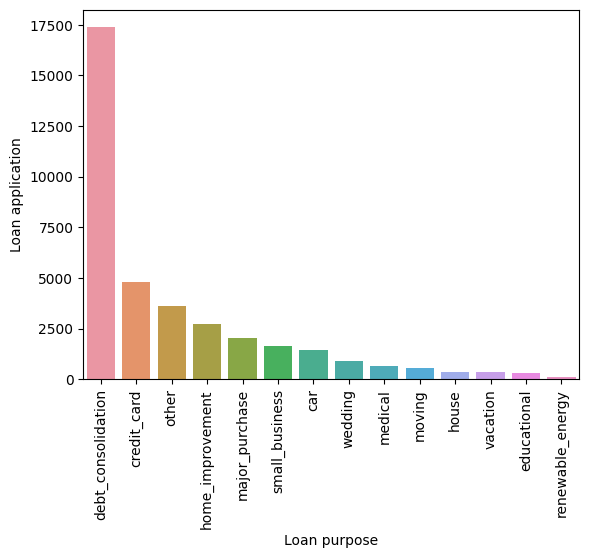

In [553]:
createBarPlot("purpose","Loan purpose",'Loan application',90)

#### Findings

47% of loan purpose is debt consolidations which eventually means multiple loans are clubbed together to form a single loan account. Next bigh chunk is the credit card that amounts to 13% of loan accounts. The lowest purpose is the renewable energy loan accounts.

#### Analysing Address State column

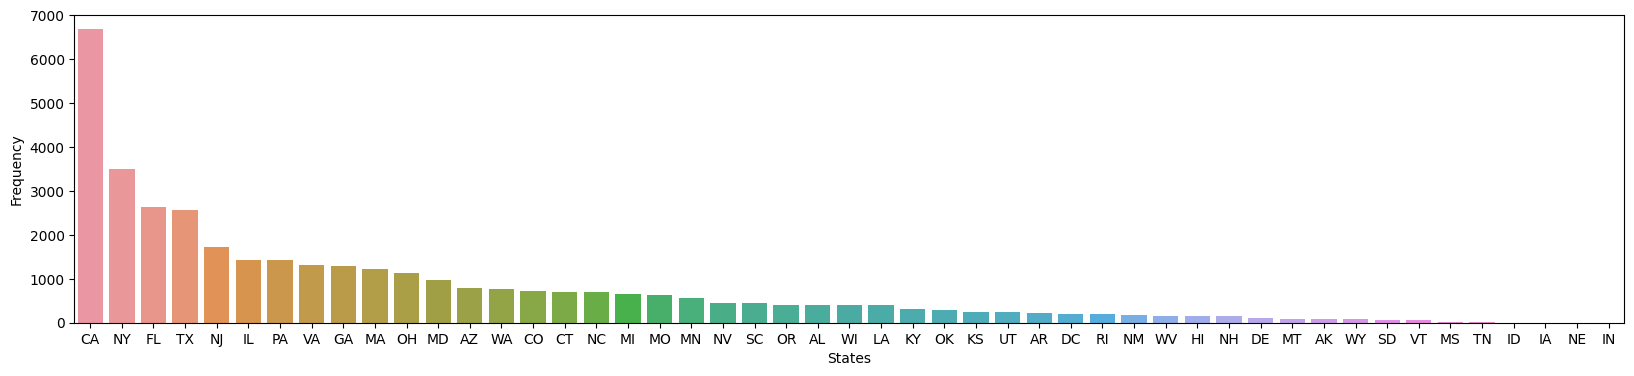

In [554]:
plt.figure(figsize=(20,4))
createBarPlot("addr_state","States",'Frequency',0)

#### Findings

18% of the loan applicants are from california while close to 10% are from New york. Lowest number of applicants are from state of Indiana.

#### Analysing DTI - Debt to income ratio

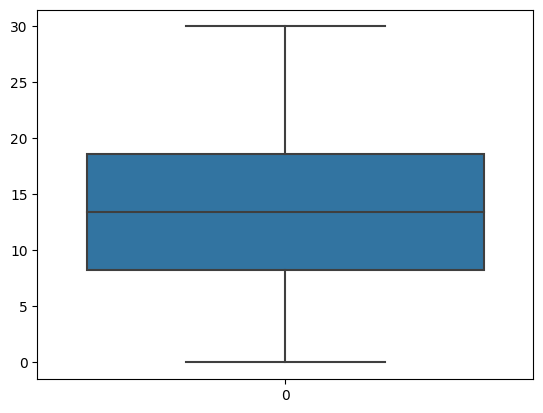

In [422]:
sns.boxplot(loan_data.dti)
plt.show()

#### Findings

Generally DTI below 36% is preffered. Our dataset contains DTI on or below 30% which is good for lenders to lend money to borrowers.

#### Analysing earliest credit line column

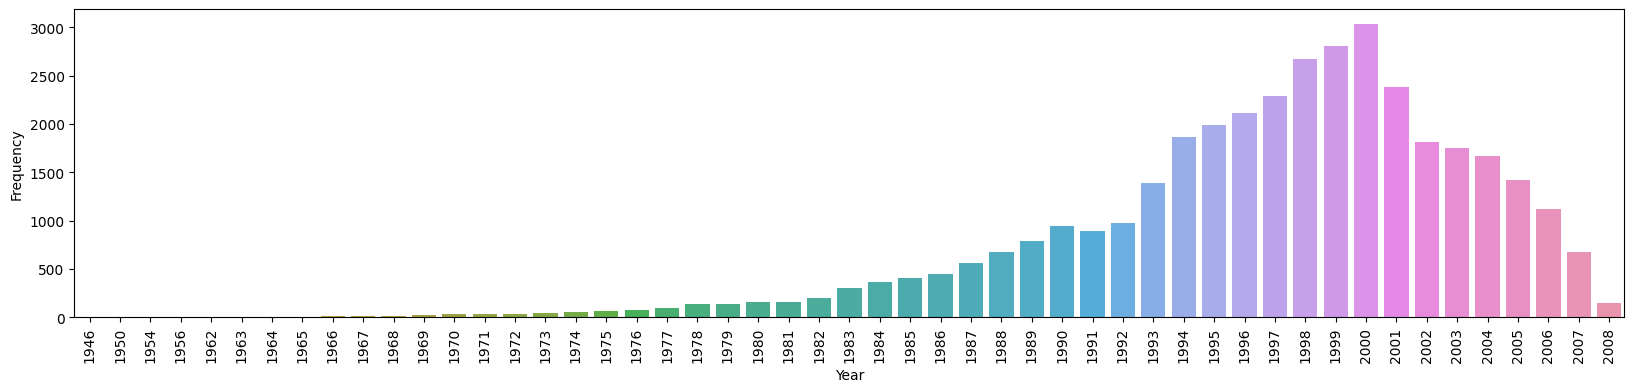

In [556]:
plt.figure(figsize=(20,4))
createBarPlot("earliest.cr.year","Year",'Frequency',90)

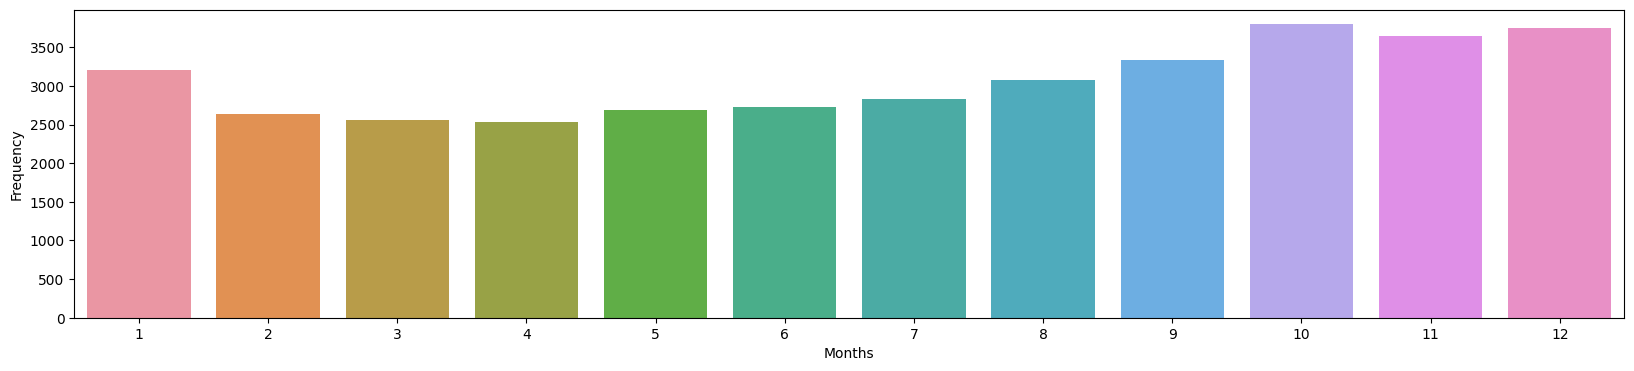

In [559]:
plt.figure(figsize=(20,4))
createBarPlot("earliest.cr.month","Months",'Frequency',0)

#### Findings

Majority of the loan credit line is released in year 2000 and last quarter of the year is the most of the credit line being utilized.

#### Analysing public derogatory record fields

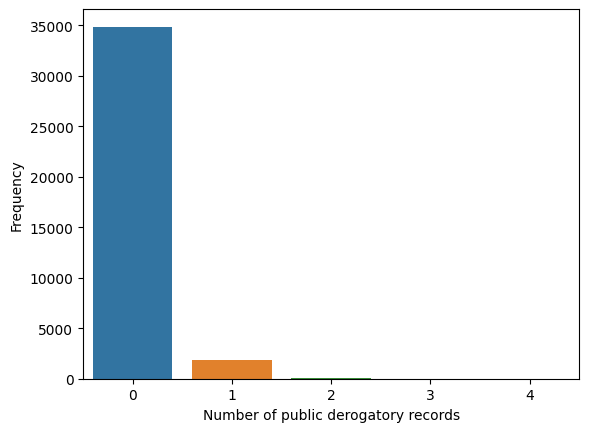

In [560]:
createBarPlot("pub_rec","Number of public derogatory records",'Frequency',0)

#### Findings

Majority of the borrowers do not have public derogatory records which is a good sign for lenders club.

#### Analysing public record for bankrupties

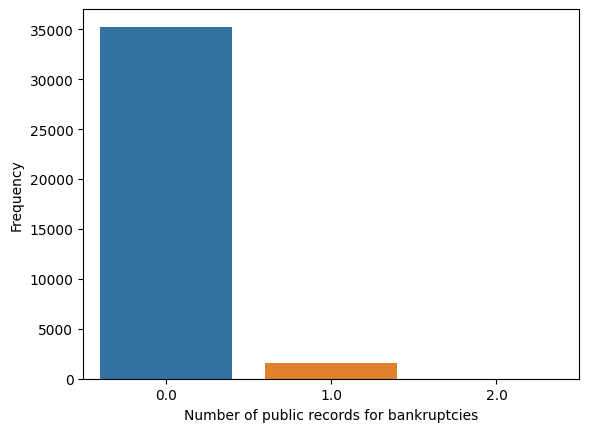

In [561]:
createBarPlot("pub_rec_bankruptcies","Number of public records for bankruptcies",'Frequency',0)

#### Findings

Majority chunk ~99% borrowers have not gone bankrupt. Great sign for lenders club.

## Segmented Univariate Analysis

in this section, we will analyze by using group of fields and comparing using aggregate values. We will be using boxplot for most of our analyis. 

Let's begin by analyzing loan amount and loan term fields together and figure out the relation between them.

Let's create functions to draw our boxplots

In [584]:
def createSegmentedBoxPlot(x,y,data,order=None):
        sns.boxplot(x=x,y=y,order=order,data=data)
        plt.show()

In [740]:
def createSegmentedBarPlot(x,y,hue,data):
    sns.barplot(x=x,y=y,hue=hue,data=data)
    plt.show()

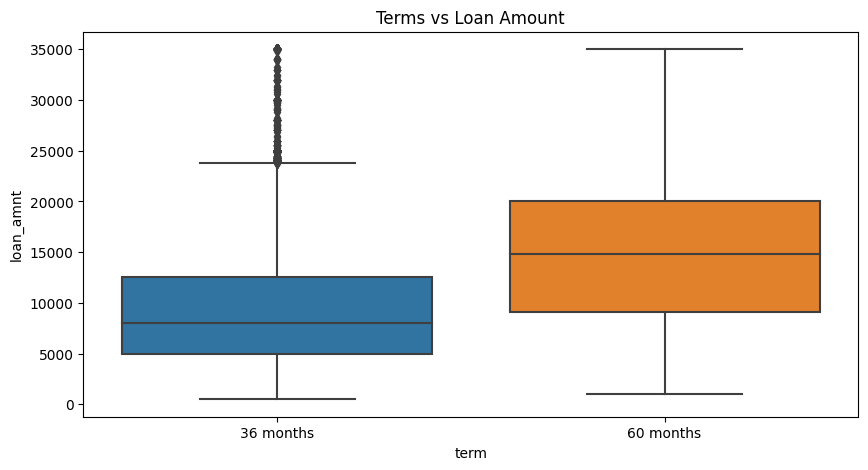

In [593]:
plt.figure(figsize=(10,5))
plt.title('Terms vs Loan Amount')
createSegmentedBoxPlot('term',loan_data.loan_amnt,data=loan_data)

#### Borrowers with higher loan tenure or term tends to take higher loan amount. Median of borrowers with 36 and 60 months tenure is significantly double.

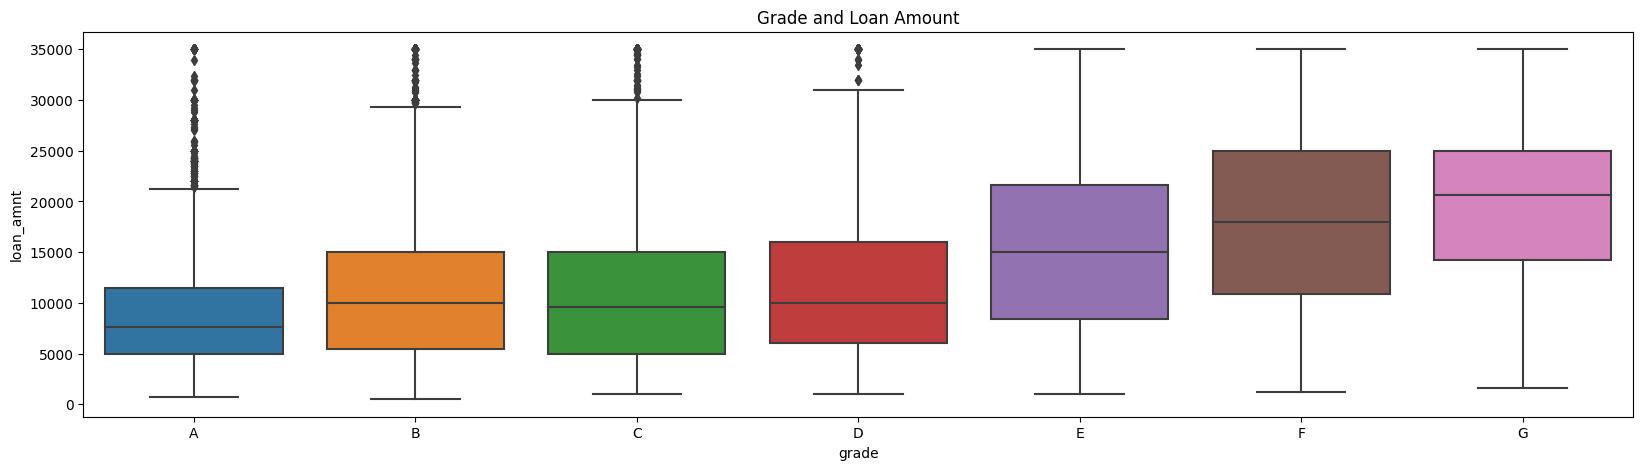

In [610]:
grade_ord = loan_data.grade.unique()
grade_ord.sort()
plt.figure(figsize=(20,5))
plt.title('Grade and Loan Amount')
createSegmentedBoxPlot('grade',loan_data.loan_amnt,data=loan_data,order=grade_ord)

#### Borrowers with lower grade especially after C are taking more loan than borrowers with good ranking such as A and B. There is definately a trend where as the grades are decreasing, loan amount is increasing.

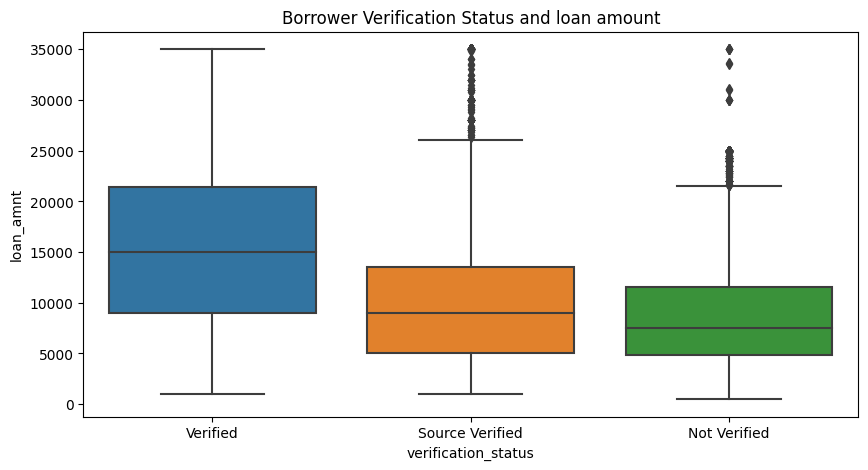

In [597]:
plt.figure(figsize=(10,5))
plt.title('Borrower Verification Status and loan amount')
createSegmentedBoxPlot('verification_status',loan_data.loan_amnt,data=loan_data)

#### For loan amount exceeding 9000, all borrowers are verified (combining verified and source verified together). This means higher loan amount are only given to borrowers with proper verification of income and assets.

plt.figure(figsize=(10,5))
plt.title('Loan Status and Loan amount')
createSegmentedBoxPlot('loan_status',loan_data.loan_amnt,data=loan_data)

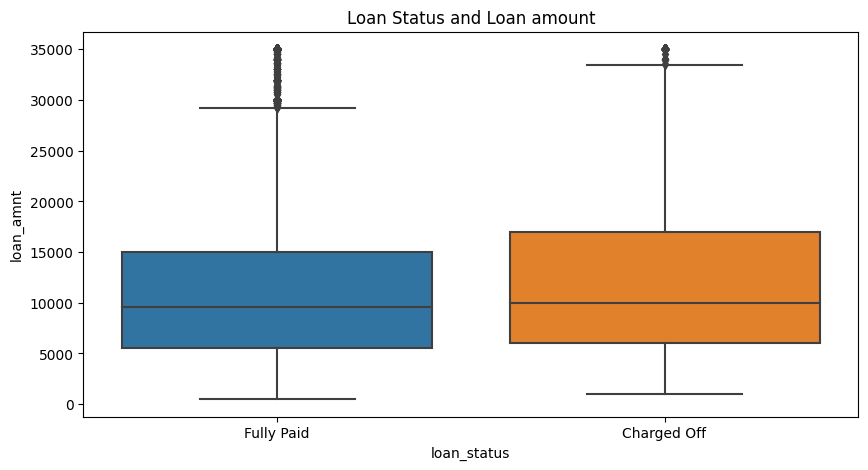

In [598]:
plt.figure(figsize=(10,5))
plt.title('Loan Status and Loan amount')
createSegmentedBoxPlot('loan_status',loan_data.loan_amnt,data=loan_data)

Charged off i.e Defaulted loans have more loan amount than fully paid loans. This eventually gives a signal that higher amount loans can be come to risk of getting default.

### Let's analyze funded amount and loan term fields together and figure out the relation between them.

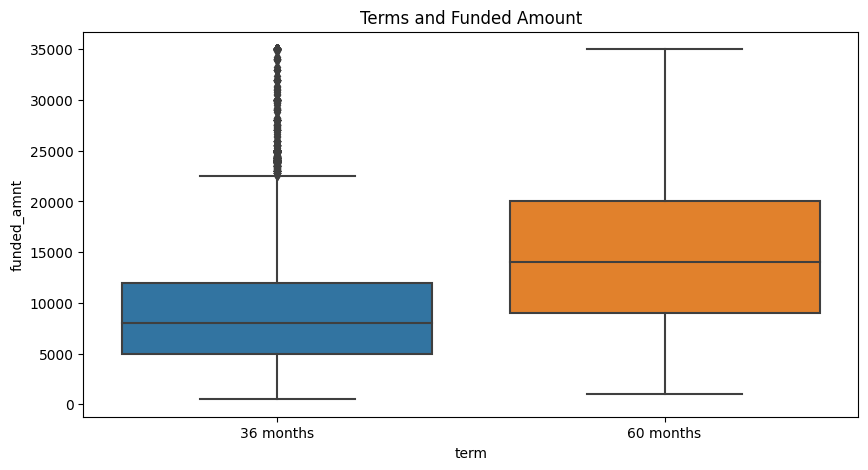

In [611]:
plt.figure(figsize=(10,5))
plt.title('Terms and Funded Amount')
createSegmentedBoxPlot('term',loan_data.funded_amnt,data=loan_data)

#### Majority of the defaulted loan are funded at the time.

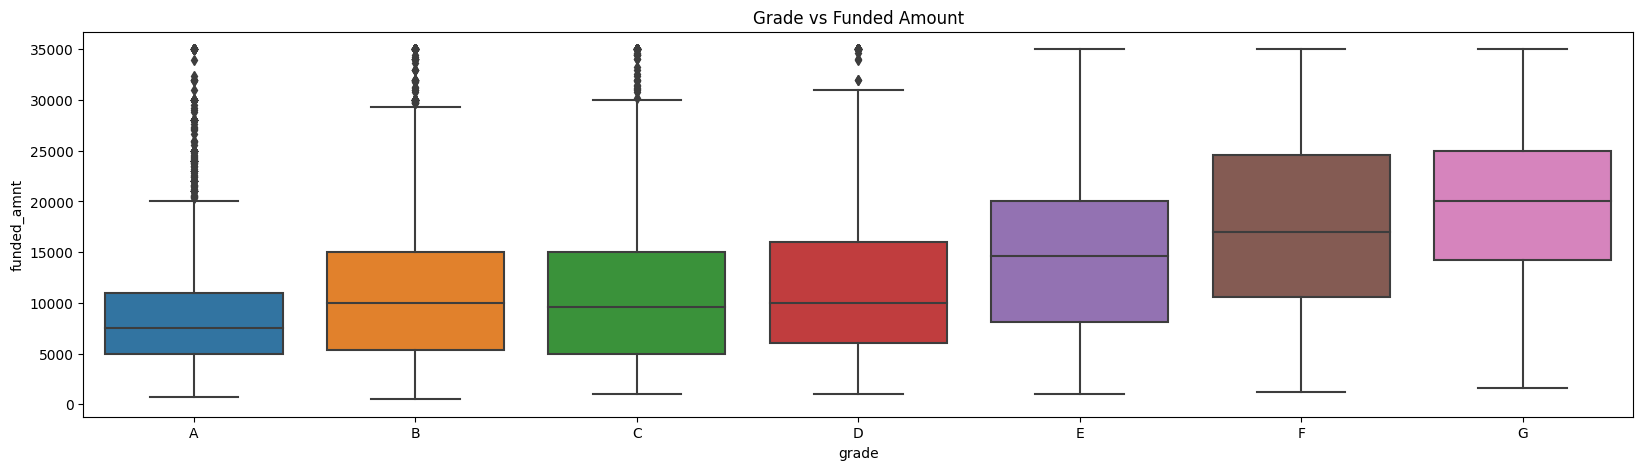

In [612]:
grade_ord = loan_data.grade.unique()
grade_ord.sort()
plt.figure(figsize=(20,5))
plt.title('Grade vs Funded Amount')
createSegmentedBoxPlot('grade',loan_data.funded_amnt,data=loan_data,order=grade_ord)

#### Borrowers with lower grades have got more floan funding than borrowers with good grade. This is not a good sign in respect to defaulting, however this may turn good for business as low grade customers are charged with higher interest rate resulting more profit to lending club.

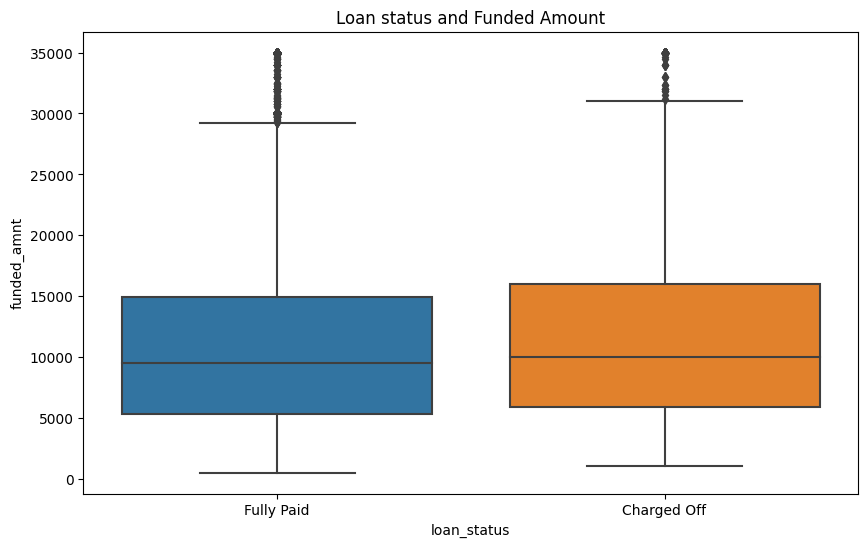

In [613]:
plt.figure(figsize=(10,6))
plt.title('Loan status and Funded Amount')
createSegmentedBoxPlot('loan_status',loan_data.funded_amnt,data=loan_data)

Defaulted loan accounts and fully paid accounts median values are similar. This is not a concerning issue because charged off loans not exceeding (still high) that high compared to fully paid loans.

### Let's analyze interest rates and loan term fields together and figure out the relation between them.

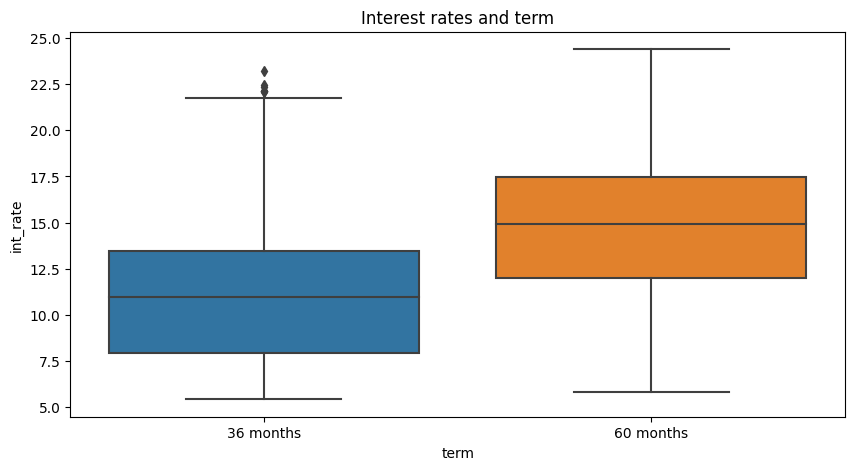

In [620]:
plt.figure(figsize=(10,5))
plt.title('Interest rates and term')
createSegmentedBoxPlot('term',loan_data.int_rate,data=loan_data)

Higher term or tenure loans have higher interest rates.

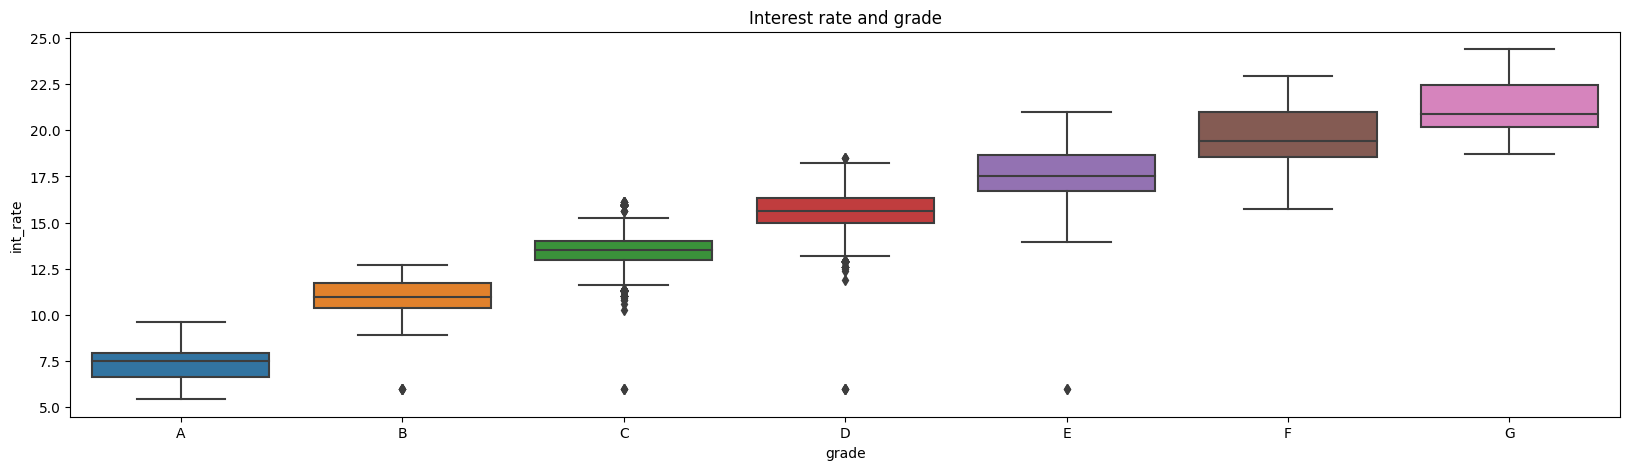

In [617]:
plt.figure(figsize=(20,5))
grade_ord = loan_data.grade.unique()
grade_ord.sort()
plt.title('Interest rate and grade')
createSegmentedBoxPlot('grade',loan_data.int_rate,data=loan_data,order=grade_ord)

As mentioned earlier, as the grades are lowering, interest rates are rising for such borrowers. This does ensure profit but increases the chance of getting default as we also observerd the majority bunch of defaulted borrowers are from high interest rate category.

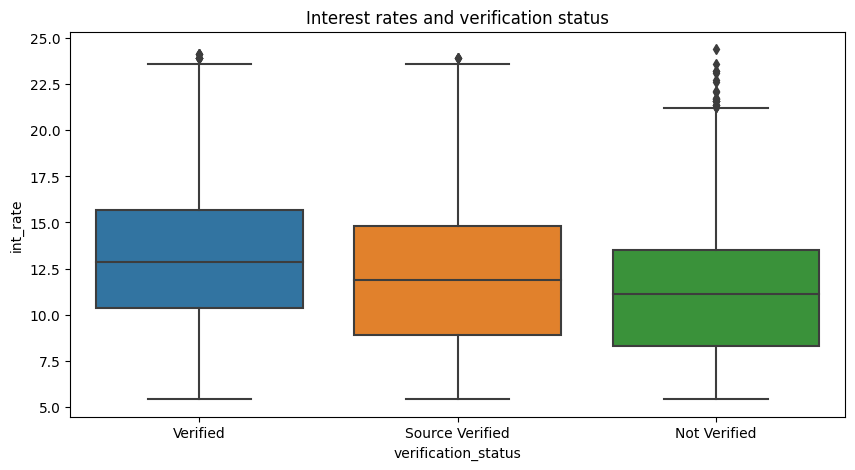

In [618]:
plt.figure(figsize=(10,5))
plt.title('Interest rates and verification status')
createSegmentedBoxPlot('verification_status',loan_data.int_rate,data=loan_data)

Borrowers who are not verified got lower interest rates on loans vs borrowers with verified source. This is not right and lenders club needs to correct it.

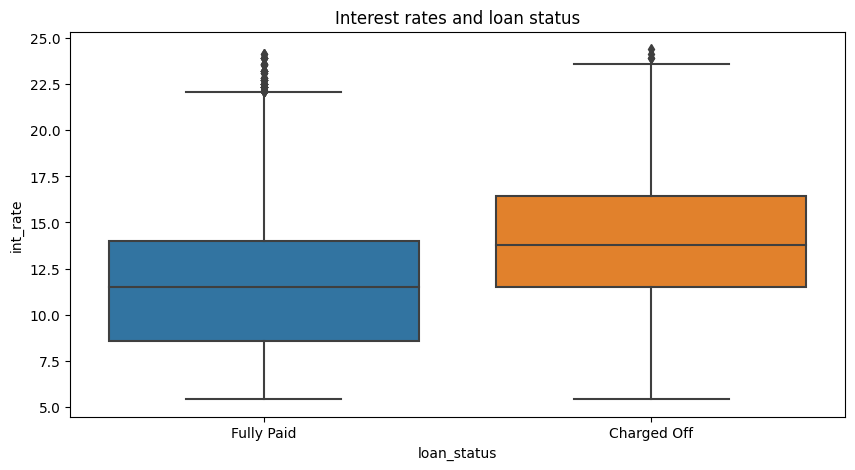

In [619]:
plt.figure(figsize=(10,5))
plt.title('Interest rates and loan status')
createSegmentedBoxPlot('loan_status',loan_data.int_rate,data=loan_data)

Like I mentioned earlier, higher interest rates leads to more default.

### Let's analyze DTI (Debt to income ration) and loan term fields together and figure out the relation between them.

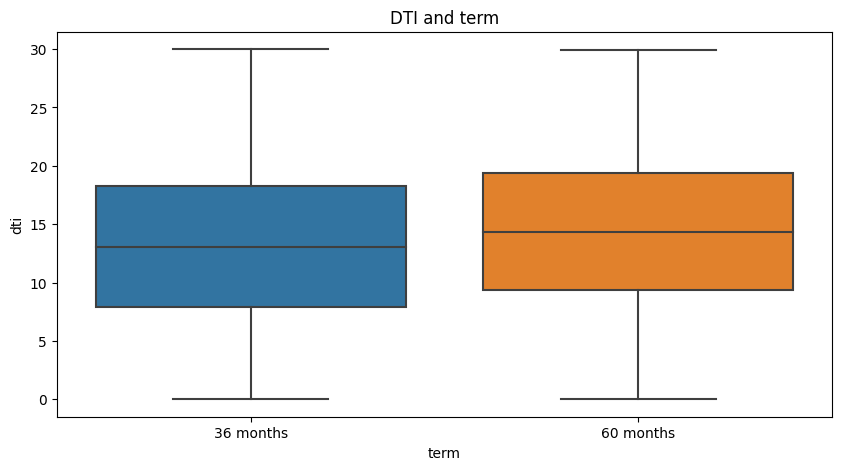

In [622]:
plt.figure(figsize=(10,5))
plt.title('DTI and term')
createSegmentedBoxPlot('term',loan_data.dti,data=loan_data)

Borrowers with higher tenure rate have high debt to income ratio i.e their debt is higher than their income.

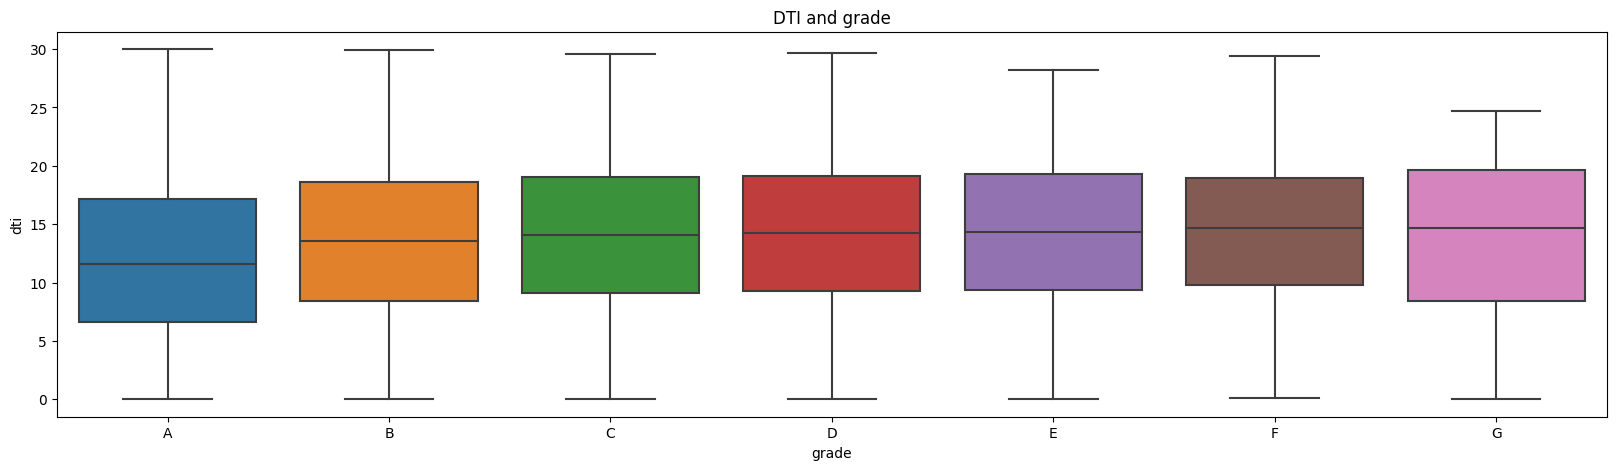

In [625]:
plt.figure(figsize=(20,5))
grade_ord = loan_data.grade.unique()
grade_ord.sort()
plt.title('DTI and grade')
createSegmentedBoxPlot('grade',loan_data.dti,data=loan_data,order=grade_ord)

Other than borrowers in A category, DTI is bit higher but not exceeding 30. This is not a bad sign however a lower DTI should be opted for good repayment possibility. Let's validate this in the next chart.

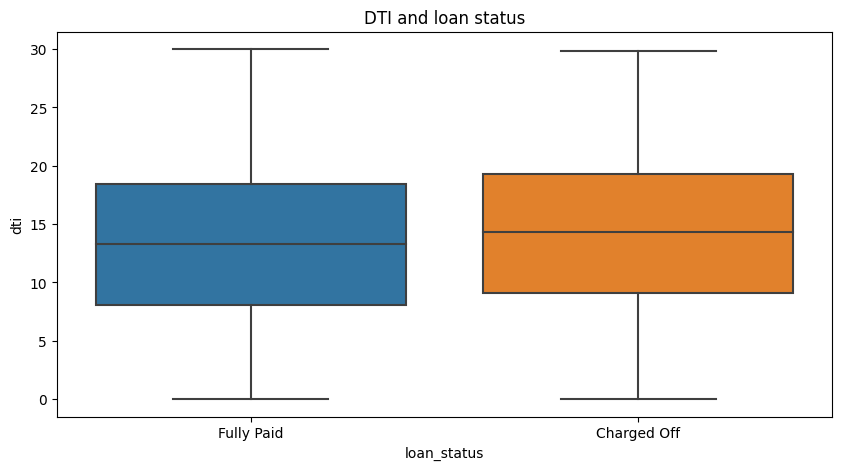

In [627]:
plt.figure(figsize=(10,5))
plt.title('DTI and loan status')
createSegmentedBoxPlot('loan_status',loan_data.dti,data=loan_data)

Borrowers with higher DTI are more prone to getting default. This indicates that DTI is one of the key factor in deciding loan application.

Let's analyze with public derogatory record with respect to loan term and understand the relationship of data.

In [665]:
pub_rec_data = loan_data.groupby(['pub_rec','term'],as_index=False)['id'].count()

In [666]:
pub_rec_data['percentage'] = pub_rec_data.groupby('pub_rec').transform(lambda x: x/x.sum())

In [667]:
pub_rec_data

,pub_rec,term,id,percentage
0,0,36 months,26152,0.75
1,0,60 months,8719,0.25
2,1,36 months,1349,0.72
3,1,60 months,526,0.28
4,2,36 months,36,0.80
5,2,60 months,9,0.20
6,3,36 months,7,1.00
7,4,36 months,2,1.00


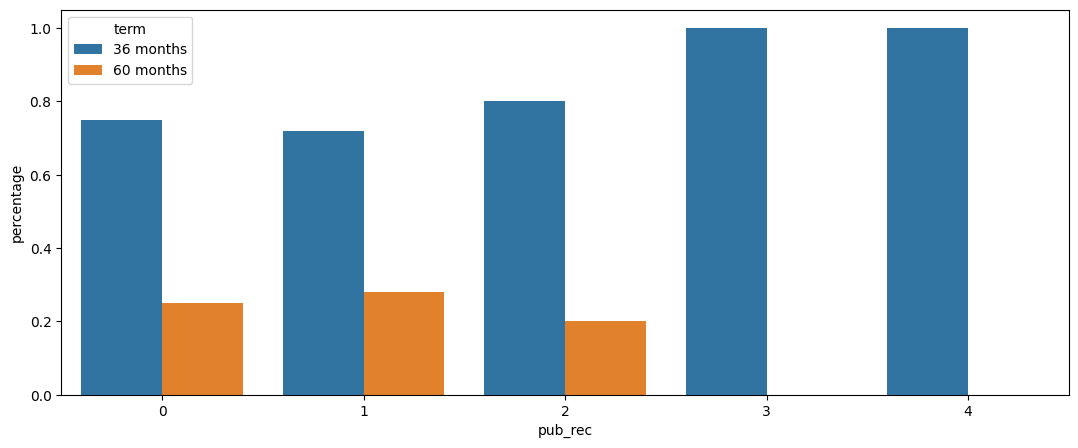

In [674]:
plt.figure(figsize=(13,5))
createSegmentedBarPlot('pub_rec','percentage','term',pub_rec_data)

After calculating a percentage and plotting a bar we can see borrowers with maximum public derogatory records took loans for 36 months term (in bar 3 and 4 respectively). Similarly we can check the grades along with public derogatory records and figure out the relationship.

In [676]:
pub_rec_data = loan_data.groupby(['pub_rec','grade'],as_index=False)['id'].count()

In [677]:
pub_rec_data['percentage'] = pub_rec_data.groupby('pub_rec').transform(lambda x: x/x.sum())

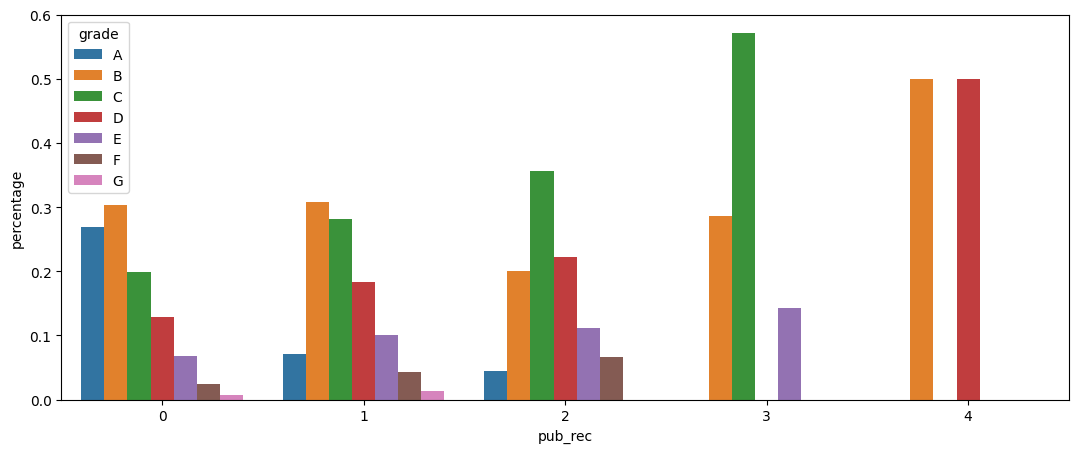

In [678]:
plt.figure(figsize=(13,5))
createSegmentedBarPlot('pub_rec','percentage','grade',pub_rec_data)

Borrowers with A grade belong to low public derogatory record while grades B,C,and D belongs to highest public derogatory records.

Let's evaluate more and see how it impacts the loan status.

In [679]:
pub_rec_data = loan_data.groupby(['pub_rec','loan_status'],as_index=False)['id'].count()

In [680]:
pub_rec_data['percentage'] = pub_rec_data.groupby('pub_rec').transform(lambda x: x/x.sum())

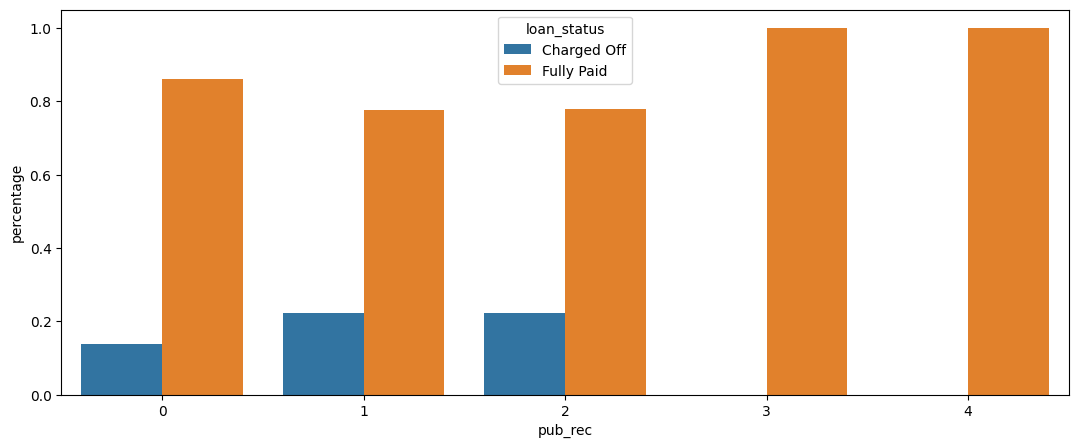

In [681]:
plt.figure(figsize=(13,5))
createSegmentedBarPlot('pub_rec','percentage','loan_status',pub_rec_data)

Interesting! There is an increase in default for people with public derogatory records but then the data is missing for higher derogatory records especailly in 3 and 4. This occurs because very few people with higher public derogatory records got loans with some exception of course.

## Bivariate Analysis

In [712]:
loan_bivariate_term_data = loan_data.groupby(['term','loan_status'],as_index=False)['id'].count()

In [713]:
loan_bivariate_term_data['percentage'] = loan_bivariate_term_data.groupby('term').transform(lambda x: x/x.sum())

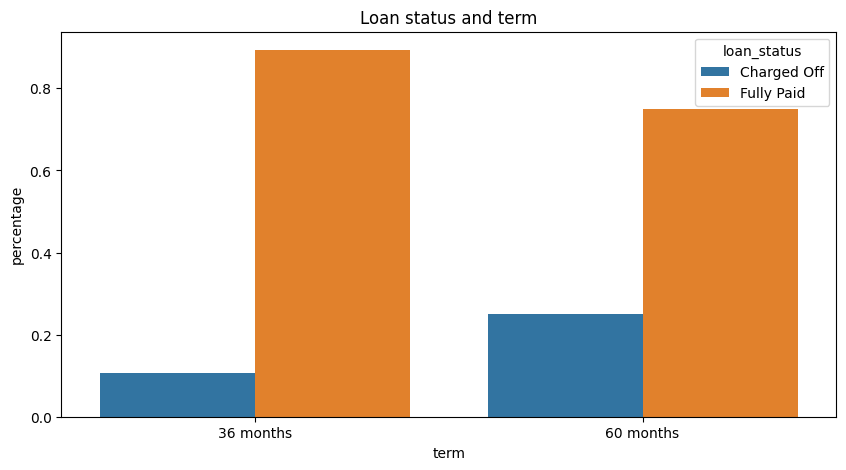

In [718]:
plt.figure(figsize=(10,5))
plt.title("Loan status and term")
createSegmentedBarPlot('term','percentage','loan_status',loan_bivariate_term_data)

There are more defaulted borrowers in the 60 months tenure or term than in 36 months term. This indicates that longer loan duration also results in the default.

Let's analyze the same with the loan amount

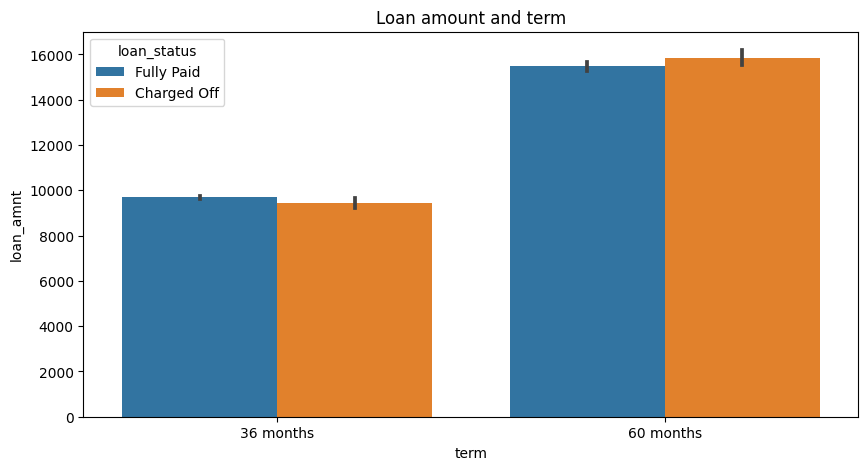

In [720]:
plt.figure(figsize=(10,5))
plt.title("Loan amount and term")
createSegmentedBarPlot('term','loan_amnt','loan_status',loan_data)

Loan amount seems to not an indicator for a defaulted loans as there are almost equal numbers of borrowers who fully paid loans and who got defaulted.

Let's see if interest rates affects the default rate.

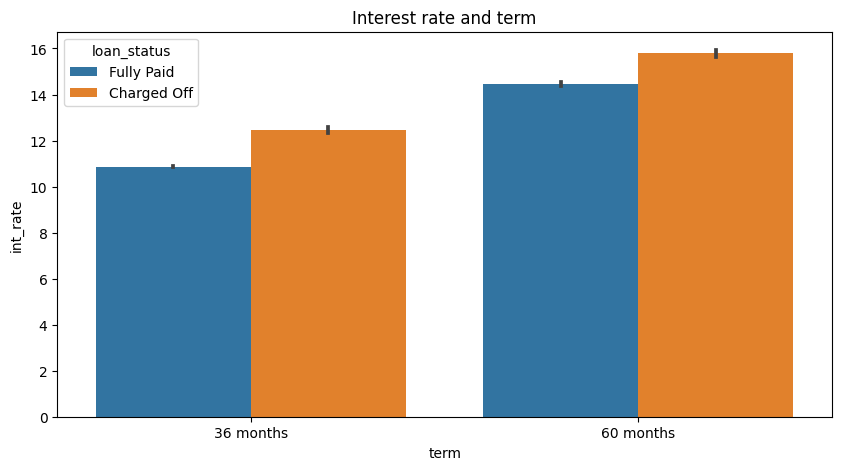

In [721]:
plt.figure(figsize=(10,5))
plt.title("Interest rate and term")
createSegmentedBarPlot('term','int_rate','loan_status',loan_data)

As guessed, higher interest rates leads to more default loans irrespective of terms. The interesting thing is that difference between interest rates of borrowrs who fully paid thier loans vs people who got defaulted is not that high. This gives an indication that adjusting an interest rate may leads to more fully paid loan than defaulted loans.

Let's see if debt to income ration impacts the default rate.

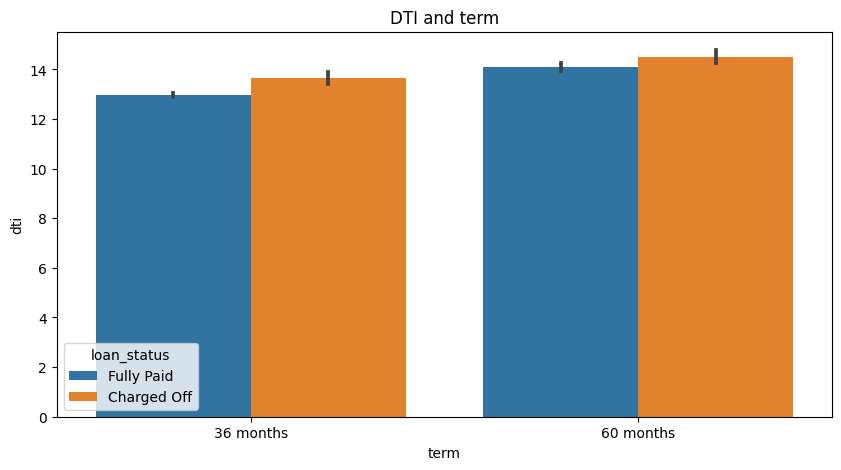

In [722]:
plt.figure(figsize=(10,5))
plt.title("DTI and term")
createSegmentedBarPlot('term','dti','loan_status',loan_data)

Borrwers with lower DTI fully paid loan vs borrowrs with high DTI seems to be defaulting in both the tenure. Here as well the difference between those group is not that huge and little tweak might help to increase the fully paid loan group.

So far we have observed the term impacts on the default rate. Let's anaylze the grade factor with respect to the defaulted loans.

In [723]:
loan_bivariate_grade_data = loan_data.groupby(['grade','loan_status'],as_index=False)['id'].count()

In [724]:
loan_bivariate_grade_data['percentage'] = loan_bivariate_grade_data.groupby('grade').transform(lambda x: x/x.sum())

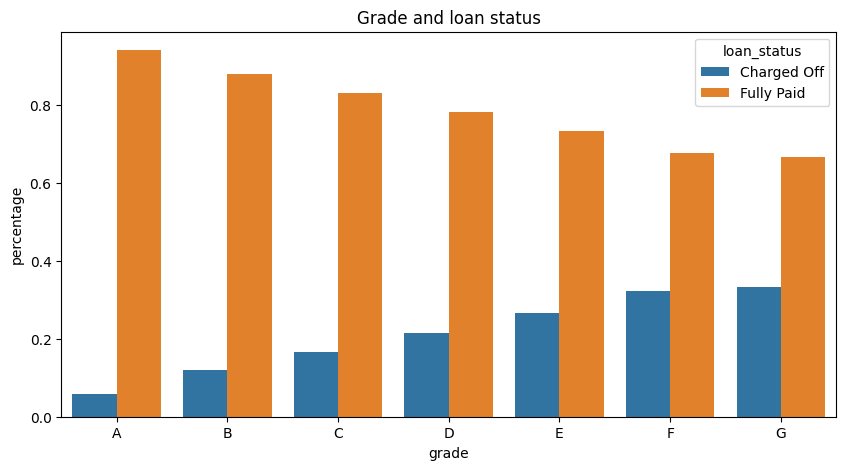

In [725]:
plt.figure(figsize=(10,5))
plt.title("Grade and loan status")
createSegmentedBarPlot('grade','percentage','loan_status',loan_bivariate_grade_data)

There is a visible pattern here. As grades are decreasing, defaulters numbers are also increasing. We can actually draw a line here and see and inclination. Like we observed this in the univariate analysis as well, grades really impacts the default rates.

Let's analyze the impact of grade in the loan amount and see if there is any difference between default rates.

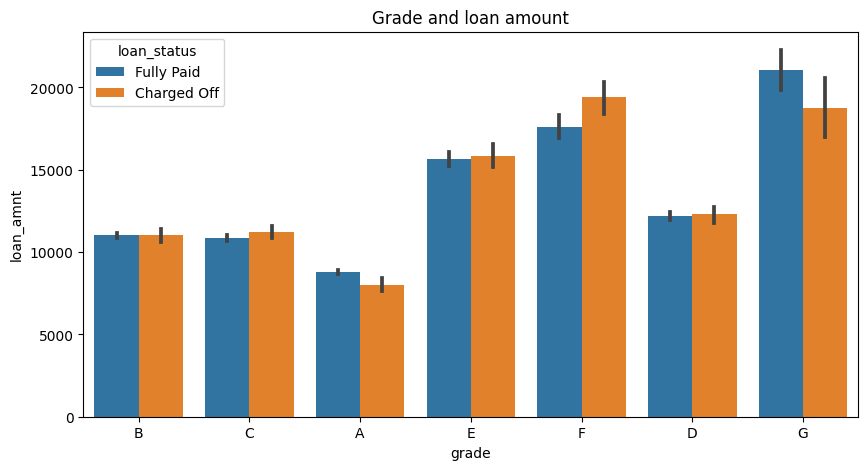

In [741]:
plt.figure(figsize=(10,5))
plt.title("Grade and loan amount")
createSegmentedBarPlot('grade','loan_amnt','loan_status',loan_data)

We already concluded that lower grade borrowers defaulted more than higher grades but also indicates that lower grades borrowers got more loan amount than higher grades.

This concludes that lenders club gives more loan amount to lower grades borrowers with high interest which in turns increases the default rate.

We can check this in the following graph as well.

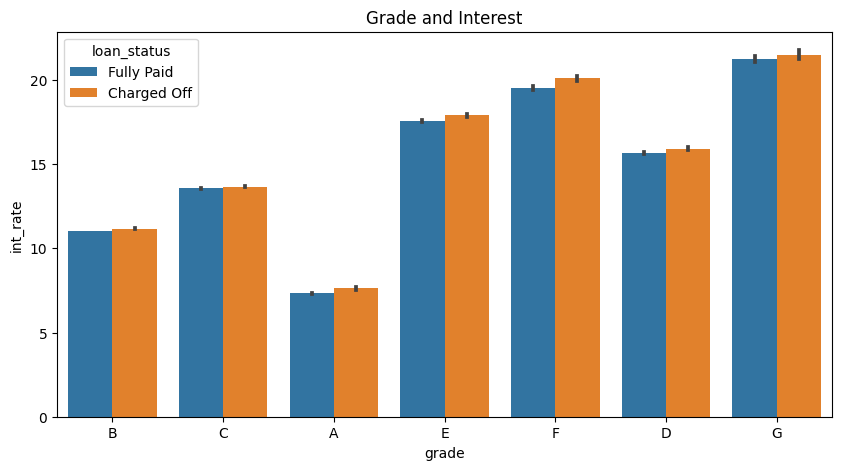

In [744]:
plt.figure(figsize=(10,5))
plt.title("Grade and Interest")
createSegmentedBarPlot('grade','int_rate','loan_status',loan_data)

Borrowers with grades E,F,and G seems to have more interest rates. Almost double than A and B. 

#### This concludes our thought stated above, combination of lower grades, more loan amount and higher interest rates cause chances of getting default. 

Let's analyze if verification status of a borrowers impact default rates.

In [748]:
loan_bivariate_verification_data = loan_data.groupby(['verification_status','loan_status'],as_index=False)['id'].count()

In [749]:
loan_bivariate_verification_data['percentage'] = loan_bivariate_verification_data.groupby('verification_status').transform(lambda x: x/x.sum())

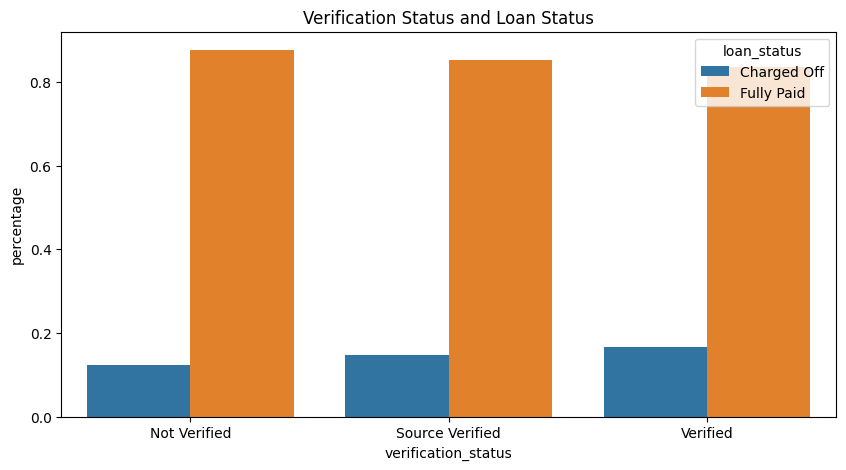

In [751]:
plt.figure(figsize=(10,5))
plt.title("Verification Status and Loan Status")
createSegmentedBarPlot('verification_status','percentage','loan_status',loan_bivariate_verification_data)

The default rates not seem to be impacted by the verification status of a borrower.

Let's also figure out if the purpose for which loan is taken impacts the default rate.

In [752]:
loan_bivariate_purpose_data = loan_data.groupby(['purpose','loan_status'],as_index=False)['id'].count()

In [753]:
loan_bivariate_purpose_data['percentage'] = loan_bivariate_purpose_data.groupby('purpose').transform(lambda x: x/x.sum())

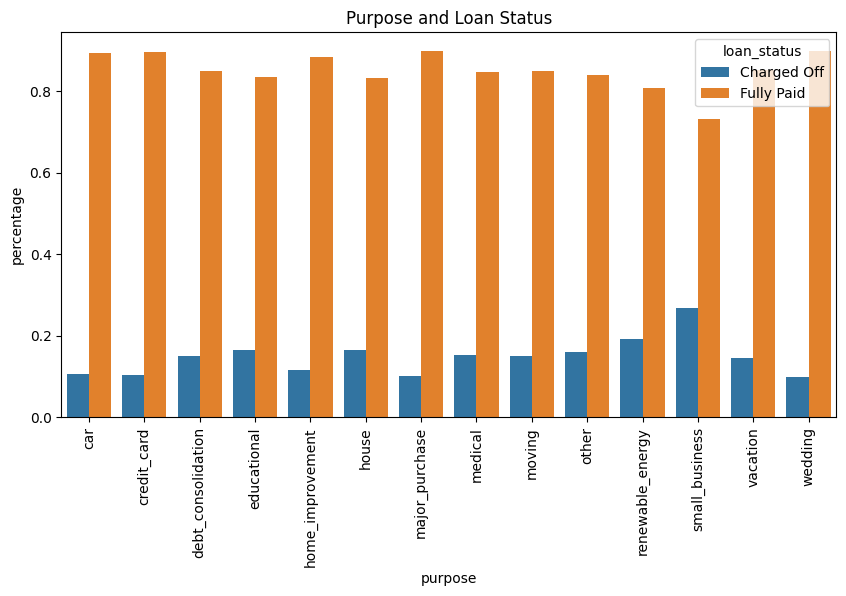

In [756]:
plt.figure(figsize=(10,5))
plt.title("Purpose and Loan Status")
plt.xticks(rotation=90)
createSegmentedBarPlot('purpose','percentage','loan_status',loan_bivariate_purpose_data)

Borrowers with purpose for small business seems to be defaulted more than other category.

Let's see if the loan amount also impacts the default rate with the purpose.

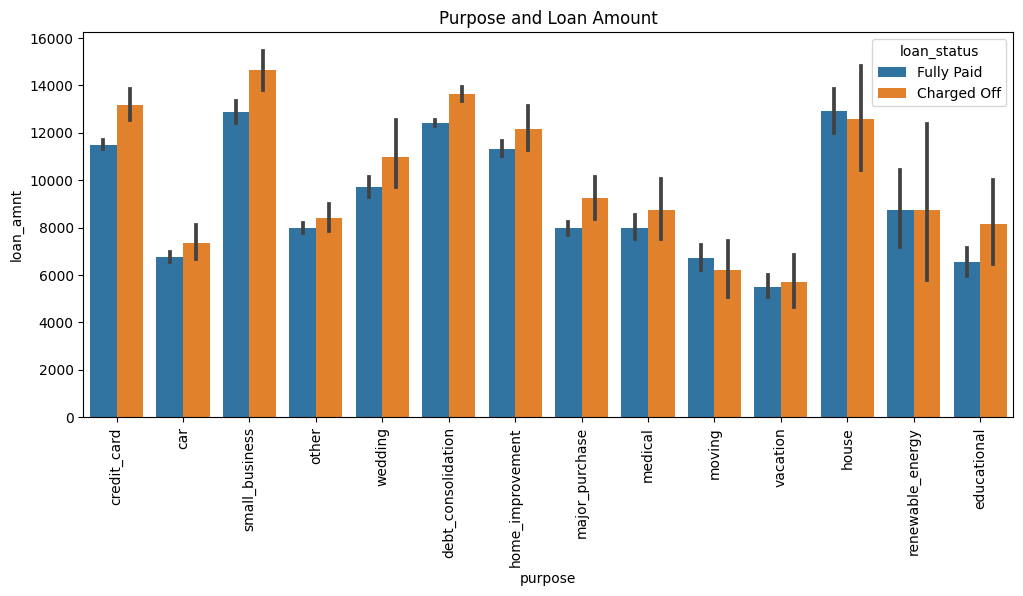

In [758]:
plt.figure(figsize=(12,5))
plt.title("Purpose and Loan Amount")
plt.xticks(rotation=90)
createSegmentedBarPlot('purpose','loan_amnt','loan_status',loan_data)

Borrowrs with small business who are defaulted have taken more loan amount than other categories. 

This again concludes our though that higher loan amount coupled with higher interest rates results in more default.

Let's reverify our thought process by plotting loan amount and interest rates with the loan status.

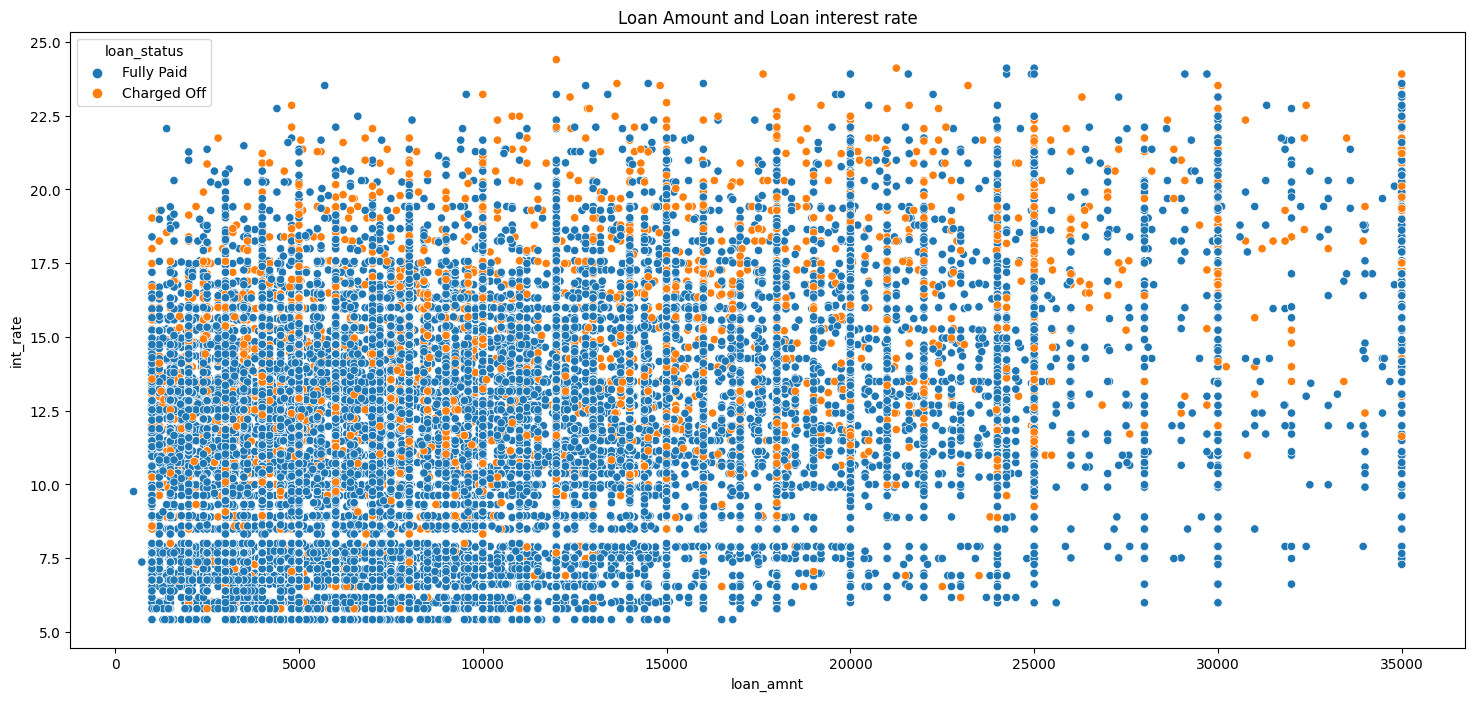

In [763]:
plt.figure(figsize=(18,8))
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan_data, hue='loan_status')
plt.title('Loan Amount and Loan interest rate')
plt.show()

As we can see, when loan amount is higher on x-axis and when interest rate is high, we definately see more defaulted loan accounts. However, there are default rates in the lower amount and lower interest also but not as significant than higher interest rates one's.

Now let's plot a correlation matrix and try to find some insights.

In [764]:
correlation_data = loan_data.corr()

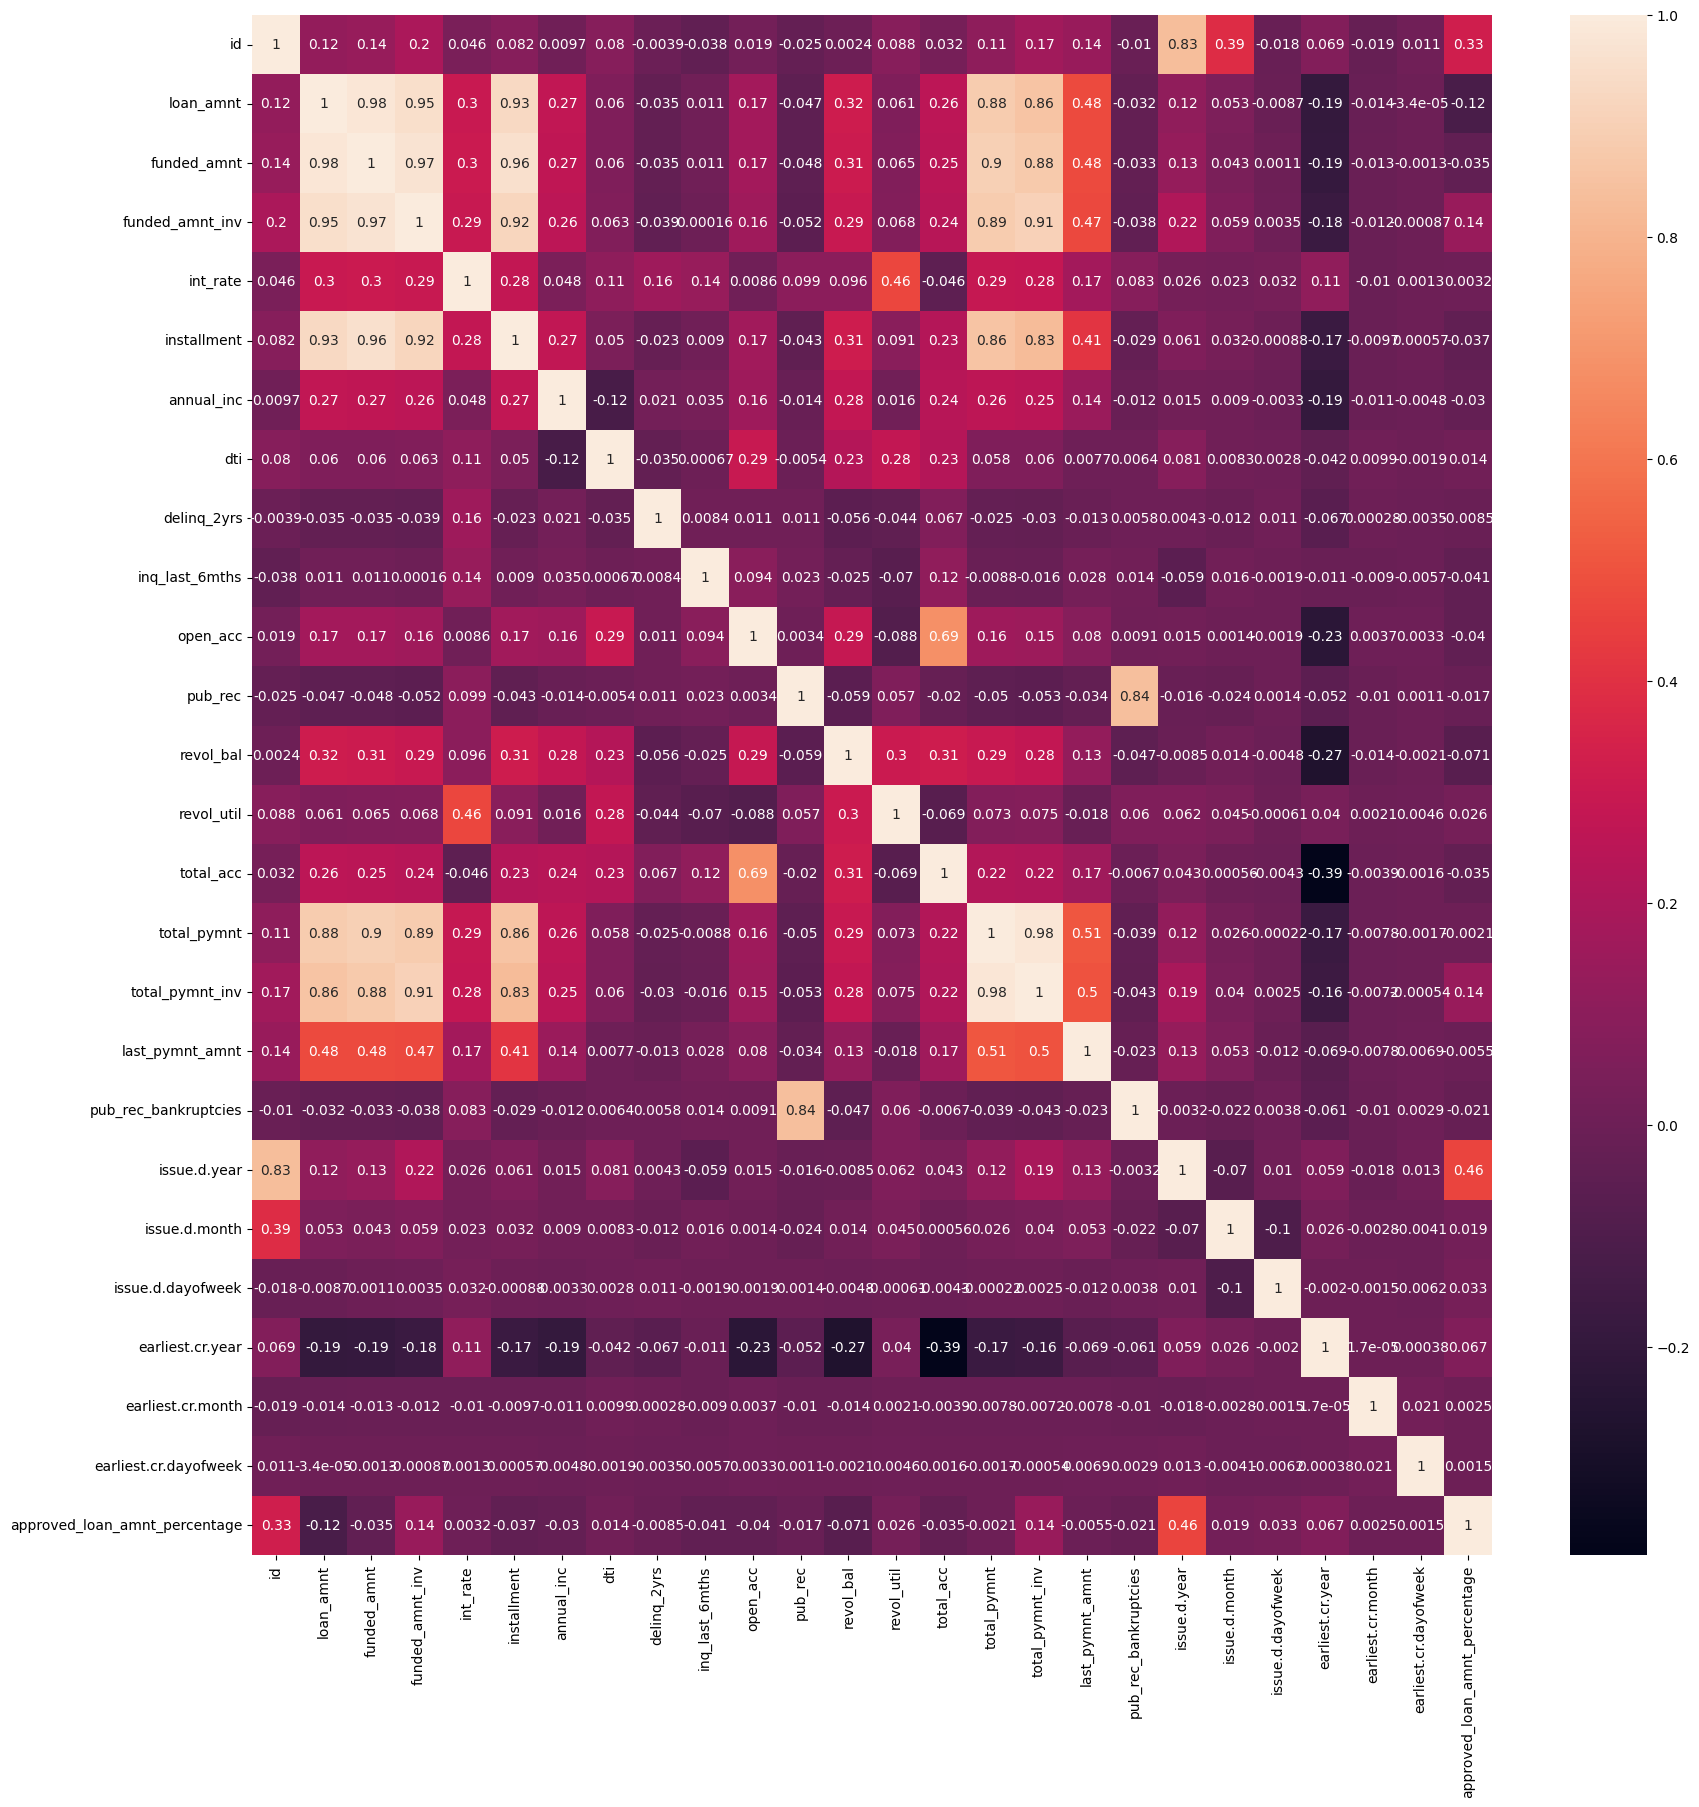

In [775]:
plt.figure(figsize=(20,20))
corr_matrix = sns.heatmap(correlation_data,annot=True)
plt.show()

Public derogatory record and public bankrupcies are highly co-related.

## Conclusion

The key driver variables that leads to loan defaults are the following:
- Interest rate: Higher the interest rates, more chance of getting default.
- Grade: Lower the grade, more chance of getting default.
- Loan Amount: Higher loan amount have high chance of getting default.
- Term: 60 months tenure have more chance of getting default.
- Annual Income: Lower annual income have more chance of getting default.
- Debt to income ratio: Higher DTI increases the risk of getting default.
- Public Bankrupties record: Higher public record of bankrupcies increase the chance of getting default.
- Purpose: Small business owners have high chance of getting default.

Public Bankrupties record have played a key role in the borrowers getting defaulted. In some cases borrowers with even lowest interest but high Bankrupties have been defaulted. Lending club should always scan this record regardless of loan amount and interest rates. 